# Supervised Learning - Classification (Magic Gamma Telescope Data Set)

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Dataset

The dataset is available at the UCI Machine Learning Repository. The data was collected by the HEGRA (High-Energy-Gamma-Ray Astronomy) experiment and is dedicated to classification problem. The dataset consist of 19020 observations and 11 features. The target variable is a binary variable called class, which represents the type of the observed particle. 

In [2]:
# Importing the dataset
pd.read_csv('magic04.data')
            

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

It seems the dataset is missing the header, so we will add it manually.

In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

It appears that the class variable is not encoded as a binary variable, so we will encode it as 0 and 1. This ensures that the target variable is binary, and can easily be used for classification. 

Using scikit-learn label encoder, we will encode the class variable as 0 and 1.

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df['class'].unique()


array([0, 1])

In [6]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      0  
1       -9.9574   6.3609  205.2610      0  
2      -45.2160  76.9600  256.7880      0  
3       -7.1513  10.4490  116.7370      0  
4       21.8393   4.6480  356.4620      0  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      1  
19016   -2.9632  86.7975  247.4560      1  
19017   -9.4662  30.2987  256.5166      1  
19018  -63.8389  84.6874  408.3166      1  
19019   31.4755  52.7310  272.3174      1  

[19020 rows x 11 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 1.5 MB


## Distribution of Variables
Plotting histograms of the variables to see their distributions.

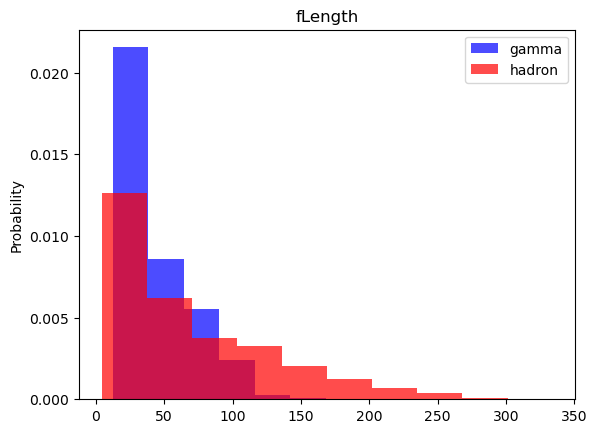

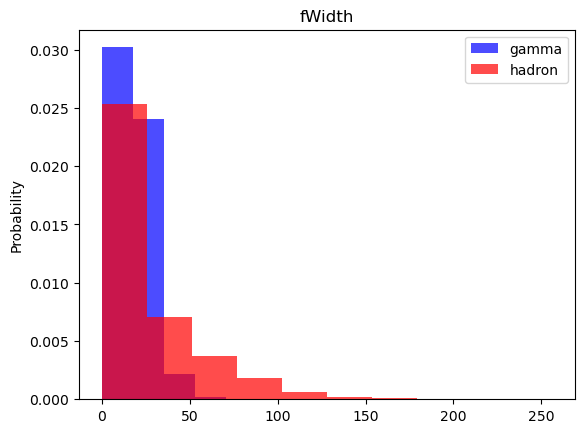

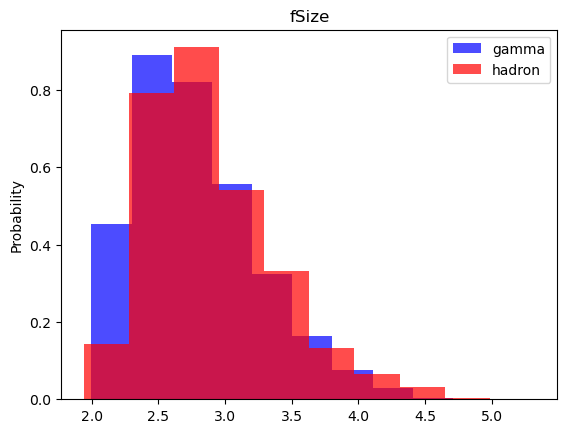

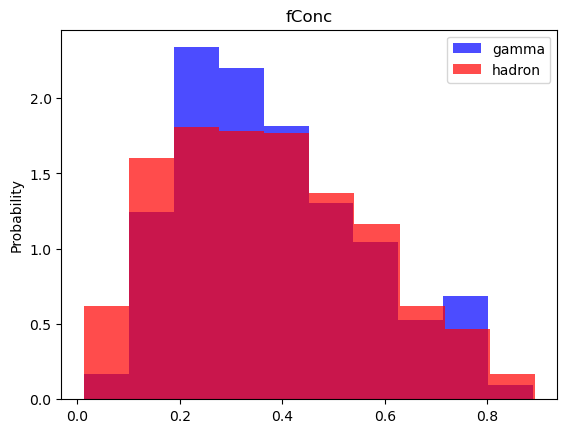

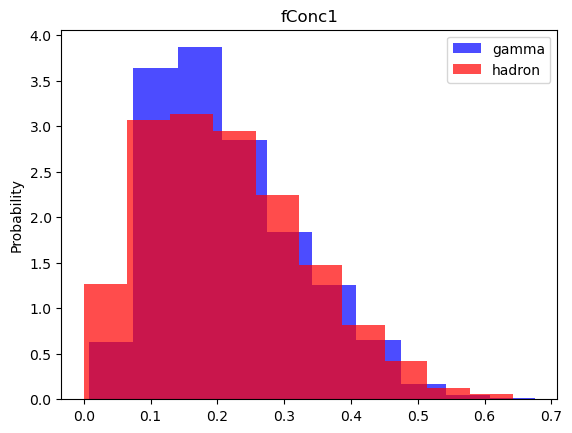

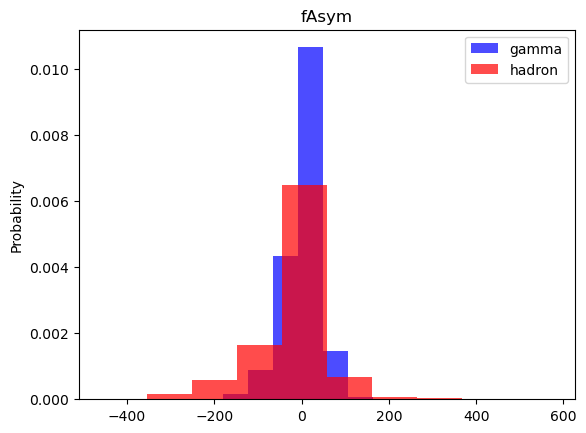

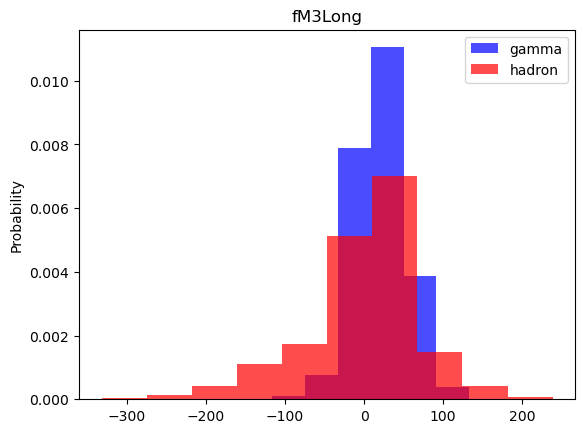

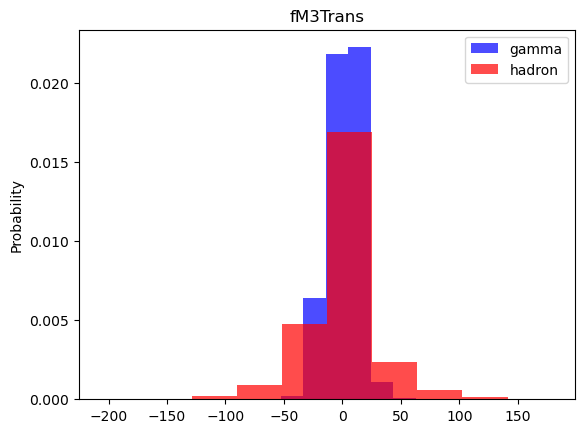

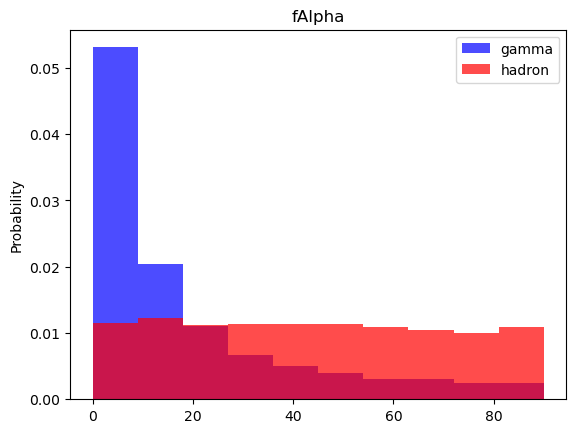

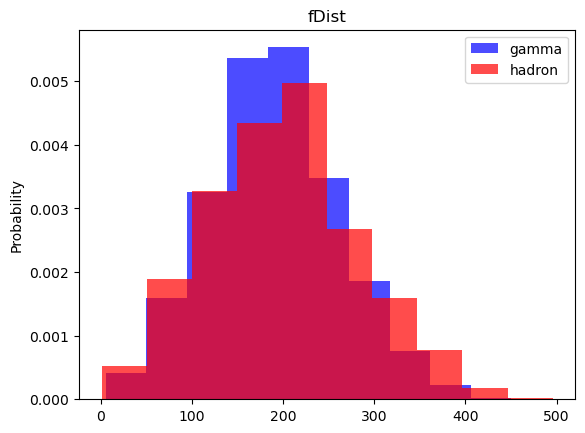

In [8]:
# every col except the target col
for col in cols[:-1]:
    plt.hist(df[df['class'] == 0][col], bins=10, alpha=0.7, label='gamma', color='blue', density=True)
    plt.hist(df[df['class'] == 1][col], bins=10, alpha=0.7, label='hadron', color='red', density=True)
    plt.legend(loc='upper right')
    plt.title(col)
    plt.ylabel('Probability')
    plt.show()


## Spliting the Dataset 
Spliting the dataset into train, test and validation sets.


In [9]:
train, validation, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))]) # 60% training, 20% validation, 20% test

# used frac=1 to shuffle the rows before splitting the data b/c the data is ordered by class



In [10]:
# scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_data(x, oversample=False):
    X = x[x.columns[:-1]].values     # returns a numpy array
    y = x[x.columns[-1]].values      # returns a numpy array

    # scale the data to be between -1 and 1
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # oversample the data using RandomOverSampler
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)


    # horizontally stack the features and labels back together
    data = np.hstack((X, np.reshape(y, (-1,1))))         # b/c y is a 1D array, we need to reshape it to (-1,1) to stack it horizontally

    return data, X, y
    

In [11]:
train

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
2378  55.4763  27.6942  3.1252  0.1837  0.0933  55.4072  45.0828   24.6334   
1536  90.1049  22.9510  3.1608  0.2272  0.1136  69.0797  92.7354   23.1460   
425   47.0893  20.5962  2.9763  0.1911  0.0956  13.9659  39.1249   -7.5246   
6164  34.4273  11.1924  2.3502  0.6205  0.3192  20.3110  29.9444    7.3949   
5495  27.3066  19.7210  2.6968  0.3337  0.1779 -10.2031  19.5438   -9.9222   
...       ...      ...     ...     ...     ...      ...      ...       ...   
6480  31.4334  10.8098  2.3918  0.4990  0.2738  30.5737  23.5748   -8.3870   
7213  93.7755  25.2669  2.9863  0.3333  0.2121 -54.2320  40.2131   11.3208   
9754  20.4531  11.3577  2.3304  0.5888  0.3061  19.9072  19.4341  -10.1197   
7613  34.5018  31.5869  3.2449  0.1986  0.1033 -17.1715  26.0977  -19.9453   
8275  58.7928  18.8266  3.1844  0.1995  0.1043  -9.4101 -33.6690  -13.9572   

       fAlpha     fDist  class  
2378   3.0860  214.3330      0  
1536  14.0470  277.0430      0  
425    2.6210  180.7090      0  
6164  17.9910  200.9250      0  
5495  28.6150   47.6641      0  
...       ...       ...    ...  
6480   1.5090  160.5220      0  
7213   3.0970  329.2200      0  
9754  74.4019  201.6410      0  
7613  36.1550  208.9470      0  
8275   5.3936  200.6180      0  

[11412 rows x 11 columns]

In [12]:
len(train[train["class"]==0]), len(train[train["class"]==1])    # gamma, hadron

(7332, 4080)

So here the data is not balanced. This might become an issue when we will try to fit a model to the data. In order to avoid this issue, we will use oversampling to balance the data. Now revisit the def scaled_data() function and add the following lines of code to it.


Oversampling is false by default. 
```python
if oversampling:
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)```

In [13]:
# properly formatted Data
train, X_train, y_train = scale_data(train, oversample=True)
# in validation and test, oversample=False b/c we don't want to oversample the validation and test sets
validation, X_val, y_val = scale_data(validation, oversample= False)
test, X_test, y_test = scale_data(test, oversample= False)


In [14]:
print(len(y_train[y_train==0]), len(y_train[y_train==1]))    # gamma, hadron    -   Equal due to over sample

7332 7332


## ML Models 


### KNN (K-Nearest Neighbors) Classifier
This is a non-parametric method used for classification and regression. It is a supervised learning algorithm. The data is 'trained' with data points corresponding to their classification. To predict the class of a given test point, it takes into account the classes of the 'K' nearest points to it.
1. First, need to define the number of neighbors (K). - K is the number of points (neighbour) we use to predict the value of the unknown point.
2. Define the distanc efunction & Calculate the distance between the unknown point and all the neighbors.


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**classification_report** - Build a text report showing the main classification metrics. The metrics are calculated by using true and false positives, true and false negatives, then it builds a text report showing the main classification metrics (precision, recall, f1-score, support). The f1-score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=1)     # we dont have paramenter about what no of neighbours to choose, so initiating with 1
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
# Predicting the Test set results
y_pred = knn_model.predict(X_test)
y_pred, y_test

(array([0, 0, 0, ..., 0, 1, 0]), array([1, 0, 0, ..., 0, 1, 0]))

for classification metrics from scikit-learn, we use:
```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
```
1. Classification Report: This is a text report showing the main classification metrics.
2. Confusion Matrix: This is a table with 4 different combinations of predicted and actual values.
3. Accuracy Score: This the classification accuracy which is the ratio of correct predictions to total predictions made.

In [18]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2516
           1       0.75      0.68      0.71      1288

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Initially 82% accuracy was achieved, which is decent. 

* precision is out of all which are labeled as positive, how many are actually positive.
* recall is out of all which are actually positive, how many are labeled as positive.

We usually look at the F1 score, which is the harmonic mean of precision and recall. This is a good measure of the model's accuracy.

In [19]:
# check with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn_model.predict(X_test)
y_pred, y_test

# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2516
           1       0.72      0.73      0.72      1288

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



slight improvemnt precision score for gammaa only. F1 score is the same, and overall accuracy is dropped to 81%, compared to 82% when k=1.

In [20]:
# check with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn_model.predict(X_test)
y_pred, y_test

# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2516
           1       0.72      0.72      0.72      1288

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



overall accuracy remains the same as was with k=3.

### Naive Bayes Classifier
Naive Bayes is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.


In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_model = GaussianNB()
model = nb_model.fit(X_train, y_train)

In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      2516
           1       0.66      0.42      0.51      1288

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Model accuracy is reduced to 72% from 82% with KNN. Also, recall and precision values for gamma are quite good, however, the recall and precision values for hadron are very low. 

### Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. The binary logistic regression model is used to estimate the probability of a binary response based on one or more predictor (or independent) variables, whats the probability of a particle being a gamma or hadron based on the given features.

model: p = mx + b              # taking P = p/(1-p) and solving for p, we get:

p = probability of a particle being a gamma or hadron

To avoid negative values, we use ln (logistic function): p = 1/(1+e^-(mx+b))

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg_model = LogisticRegression()
model = lg_model.fit(X_train, y_train)

In [26]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2516
           1       0.67      0.72      0.69      1288

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



Accuracy is Better than Bayes but not as good as KNN. 

### SVM (Support Vector Machine) Classifier
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**Goal:** to find a hyperplane (with heighest margins) in an N-dimensional space (N — the number of features) that distinctly classifies the data points. 

It is imp to choose such a hyperplane that has maximum margin, or distance between points. This accounts for the better classification.

points on the margins are called support vectors. Hence, SVMs. SVMs arent good for large datasets, as they are computationally intensive. Also, they dont perform well on datasets with lots of noise & outliers, as they tend to overfit.

In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
model = svm_model.fit(X_train, y_train)

In [29]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2516
           1       0.80      0.79      0.79      1288

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



It appears the model accuracy is 87% which is better than all the previous models. Also, the recall and precision values for gamma and hadron are quite good.

### Neural Network
A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. 

Important parameters for neural networks are:
* **Number of hidden layers** -                  1 or 2
* **Number of neurons in each layer**-          10, 50, 100, 500, 1000
* **Activation function** -                     relu, sigmoid, tanh            
* **Optimizer** -                              adam, sgd
* **Loss function** -                         binary_crossentropy, mean_squared_error




When look briefly, Neural network is just a weight times some input layer - Typical Linear Combination. However, with ***activation function***, every output of a neuron is not a linear-combination of input & hidden layers, instead is is some sort of **altered version** of the Linear state. This means in input to the next neuron in the hidden layer is non-linear, as we introduced non-linearity in the form of activation function.

**Activation Function** -
* **Sigmoid** - 0 to 1, good for binary classification
* **Tanh** - -1 to 1, good for binary classification
* **Relu** - 0 to infinity, good for multiclass classification


#### What happens when train a Neural Network?

We calculate the Loss, feed the loss in the model, and then the model adjusts the weights to reduce the loss. This is called **Backpropagation**. This is done for every epoch, **epoch** is one complete pass through the entire dataset.

* ***Backpropagation*** - is a method used in artificial neural networks to calculate a gradient that is needed in the calculation of the weights to be used in the network. Backpropagation is shorthand for "the backward propagation of errors," since an error is computed at the output and distributed backwards throughout the network’s layers. It is commonly used to train deep neural networks, a term referring to neural networks with more than one hidden layer. <br>
The loss function is calculated using the weights and biases in the network. The weights and biases are then adjusted using gradient descent. The gradient descent algorithm requires the partial derivative of the loss function with respect to all the weights and biases in the network. Calculating these partial derivatives is what backpropagation is all about. <br> 
<br> 
This leads to new weights --> $w_{0, new}$ = $w_{0, old}$ + $\alpha$* <br>
<br>
$\alpha$ is the learning rate, which is a hyperparameter. It is a value between 0 and 1. It is used to control the rate at which the model learns. If the learning rate is too small, the model will take a long time to converge. If the learning rate is too large, the model might never converge. It is important to find a good learning rate. <br>

* ***Epoch*** - One epoch is when an entire dataset is passed forward and backward through the neural network only once. <br>
<br>
<br>

**Optimizer** - The optimizer is the algorithm used to change the attributes of the neural network such as weights and learning rate in order to reduce the losses. There are many optimizers available in Keras. Some of them are:
* SGD (Stochastic Gradient Descent)
* Adam
* RMSprop
* Adagrad
* Adadelta
* Adamax
* Nadam
* Ftrl

**Loss Function** - The loss function is used to measure the performance of a machine learning model. There are many loss functions available in Keras. Some of them are:
* Mean Squared Error (MSE)
* Mean Squared Logarithmic Error (MSLE)
* Mean Absolute Error (MAE)
* Binary Cross-Entropy
* Categorical Cross-Entropy
* Sparse Categorical Cross-Entropy
* Hinge
* Squared Hinge
* Categorical Hinge
* Kullback-Leibler Divergence
* Poisson
* Cosine Proximity


In conclusion, after loss calculation, the gradient is calculated and making adjustments to the weights and biases. This is done for every epoch.

#### using Tensorflow and Keras to build a Neural Network
**Tensorflow** makes is easy to define these models, and also gives us enough control over what we are feeding to the model. Its an open source lib that helps train ML models.<br>
**Keras** is a high-level API that is used to build and train deep learning models. It is very easy to use and is very efficient, as Keras uses Tensorflow as backend. 

In [30]:
import tensorflow as tf

#### Model Explained:
* **Sequential** - The Sequential model is a linear stack of layers. It means that we can create a Sequential model and add layers to it one by one in a linear manner.
* **Dense** - Dense layer is the regular deeply connected (each node connected to every other node in the layer) neural network layer. It is most common and frequently used layer.
* **Activation** - Activation function is used to introduce non-linearity in neural networks. It squashes the input into smaller output. It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

#### Model Compilation:
* **Optimizer** - The optimizer is the algorithm used to change the attributes of the neural network such as weights and learning rate in order to reduce the losses. There are many optimizers available in Keras. 
* **Loss Function** - The loss function is used to measure the performance of a machine learning model. There are many loss functions available in Keras.
* **Metrics** - A metric is a function that is used to judge the performance of your model. Metric functions are to be supplied in the metrics parameter when a model is compiled.

In [42]:
# defining all the loss on every epoch
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.title('Loss on every epoch')
    plt.show()

# defining all the accuracy on every epoch
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.title('Accuracy on every epoch')
    plt.show()

    

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape = (10,)),              # 32 dense nodes in the first layer with relu activation function, and we have to define input shape for the first layer as we have 10 features
    tf.keras.layers.Dense(32, activation='relu'),                                   # 32 dense nodes in the second layer with relu activation function                      
    tf.keras.layers.Dense(1, activation= 'sigmoid')                                  # 1 dense node in the output layer with sigmoid activation function
    ])

# Compile the model
nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                  metrics=['accuracy'])   # Adam optimizer with learning rate 0.001
# it already has a loss function and an optimizer, so we just need to define the metrics we want to use to evaluate the model
# we want to use accuracy as our metric


Tensorflow is great in tracking the training history. We can use this to plot the training and validation loss for comparison. In this case, we already have a validation defined above, however, Tensorflow has a builtin option to split the training set intp validation and training set. We use the built-in option here.. Few terms:
* **Batch Size** - Total number of training examples present in a single batch.
* **verbose** - Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.  This is just for the output display. By selecting 0, we are telling the model to not display the output.

In [44]:
# Train and History of the model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

#### Plotting Loss and Accuracy throughout Training

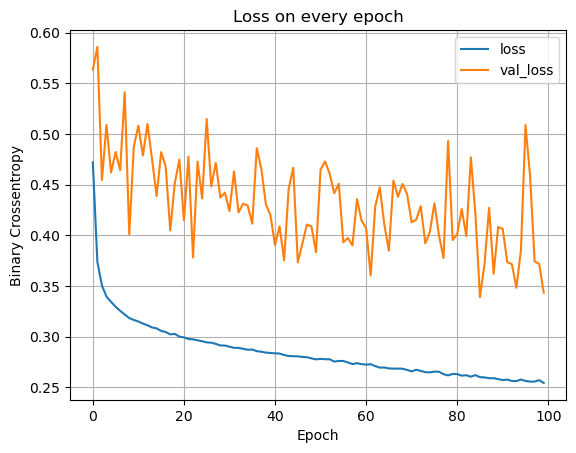

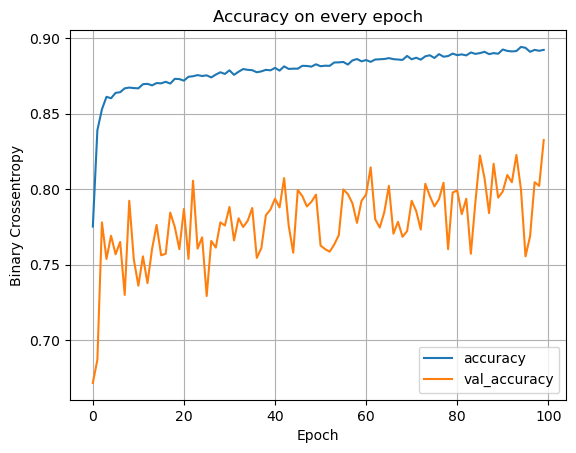

In [43]:
plot_loss(history)
plot_accuracy(history)

Appearently, decreasing loss and increasing accuracy as the epochs increase. This is a good sign, as it means the model is learning and improving. However, This is not the full picture. It maybe possible that validation loss and accuracy performs differently as it did on the training loss and accuracy, maybe it is adapting to the data too much, and not generalizing well. This is called **overfitting**.<br>
<br>
We can introduce some chage to our model, to avoid potential risk of overfitting. Last code:
    
```python
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape = (10,)),              # 32 dense nodes in the first layer with relu activation function, and we have to define input shape for the first layer as we have 10 features
    tf.keras.layers.Dense(32, activation='relu'),                                   # 32 dense nodes in the second layer with relu activation function                      
    tf.keras.layers.Dense(1, activation= 'sigmoid')                                  # 1 dense node in the output layer with sigmoid activation function
    ])

# Compile the model
nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                  metrics=['accuracy'])   # Adam optimizer with learning rate 0.001
# it already has a loss function and an optimizer, so we just need to define the metrics we want to use to evaluate the model
# we want to use accuracy as our metric

# Train and History of the model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

```

Altered code: (added dropout layer - randomly drops some nodes in the network, to avoid overfitting)

```python
def train_model(X_train, y_train, num_nodes, droupout_prob, learningrate, latch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10,)),           
        tf.keras.layers.Dropout(droupout_prob),   
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(droupout_prob),                                   
        tf.keras.layers.Dense(1, activation= 'sigmoid')    
        ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learningrate), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return history, nn_model
```

In [62]:
# Train and History of the model
def train_model(X_train, y_train, num_nodes, droupout_prob, learningrate, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10,)),           
        tf.keras.layers.Dropout(droupout_prob),   
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(droupout_prob),                                   
        tf.keras.layers.Dense(1, activation= 'sigmoid')    
        ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learningrate), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    
    
    return nn_model, history

In [65]:
# Alter the loss and accuracy charts
def plot_history(history):

    print("History object:", history)
    print("History attributes:", dir(history))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    #fig.suptitle('Loss and Accuracy with {history.params["epochs"]} epochs, 
    #             {history.params["batch_size"]} batch size, {history.params["steps"]} steps per epoch')
    # plot loss
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss - Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)
    ax1.set_title('Loss on every epoch')

    # plot accuracy
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    ax2.set_title('Accuracy on every epoch')

    plt.show()



num_nodes: 16, droupout_prob: 0, learningrate: 0.01, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951C729FD0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train

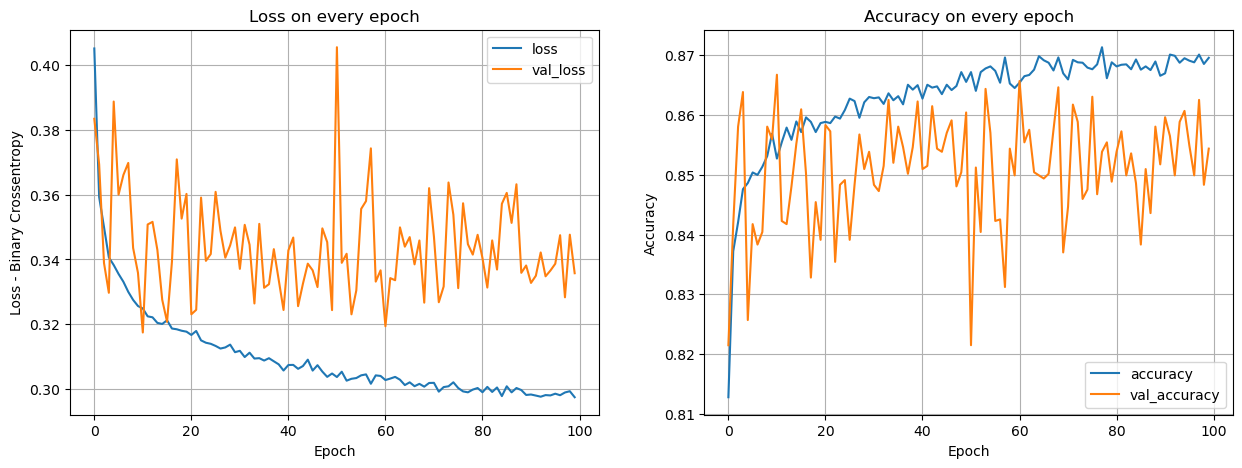

119/119 [==============================] - 0s 883us/step - loss: 0.3357 - accuracy: 0.8544
num_nodes: 16, droupout_prob: 0, learningrate: 0.01, batch_size: 64
History object: <keras.callbacks.History object at 0x0000019519FDDDD0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_beg

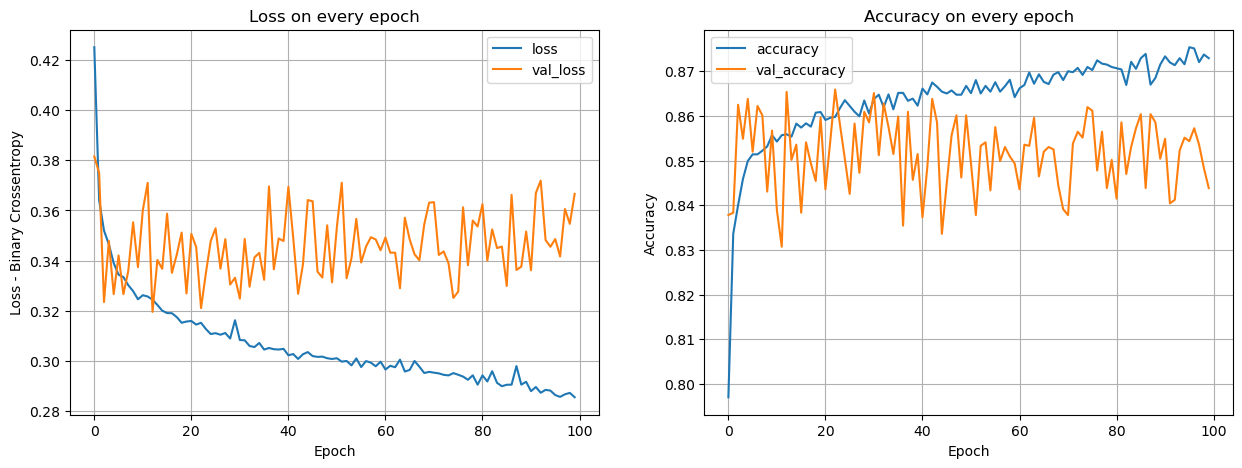

119/119 [==============================] - 0s 899us/step - loss: 0.3666 - accuracy: 0.8438
num_nodes: 16, droupout_prob: 0, learningrate: 0.01, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019518F69450>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

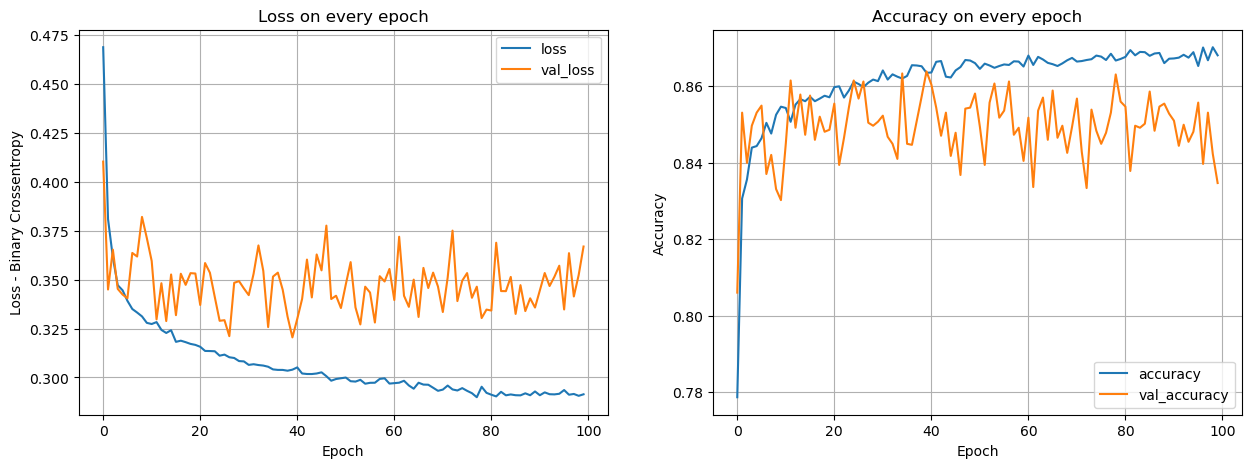

119/119 [==============================] - 0s 831us/step - loss: 0.3669 - accuracy: 0.8346
num_nodes: 16, droupout_prob: 0, learningrate: 0.005, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019517914690>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

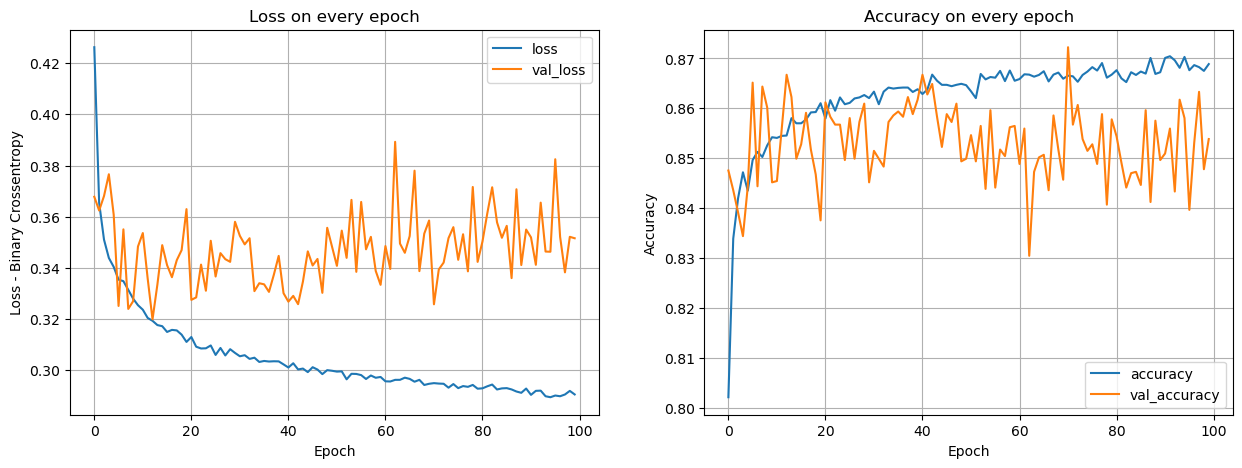

119/119 [==============================] - 0s 842us/step - loss: 0.3516 - accuracy: 0.8538
num_nodes: 16, droupout_prob: 0, learningrate: 0.005, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951E1CC390>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

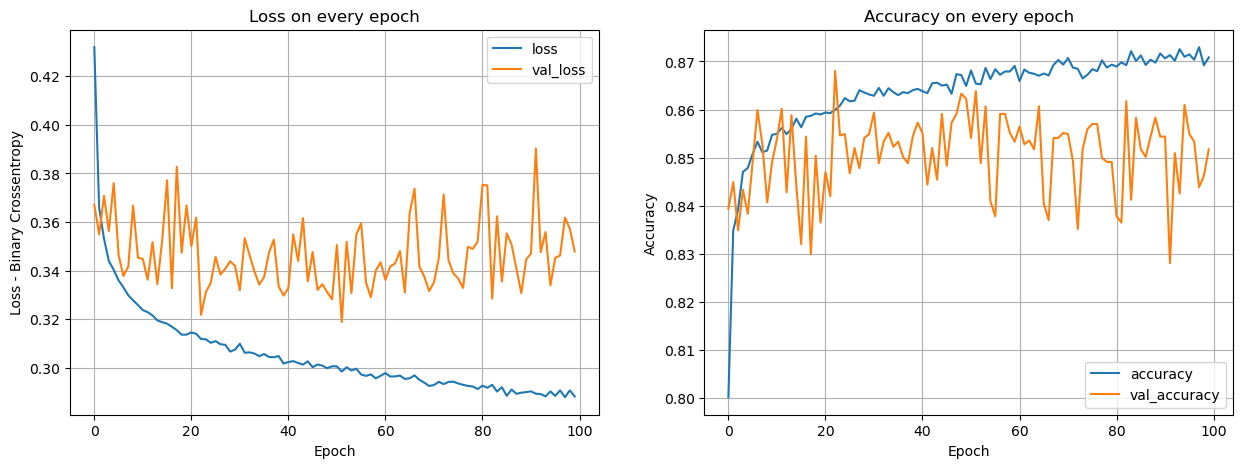

119/119 [==============================] - 0s 845us/step - loss: 0.3479 - accuracy: 0.8517
num_nodes: 16, droupout_prob: 0, learningrate: 0.005, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951EF55FD0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

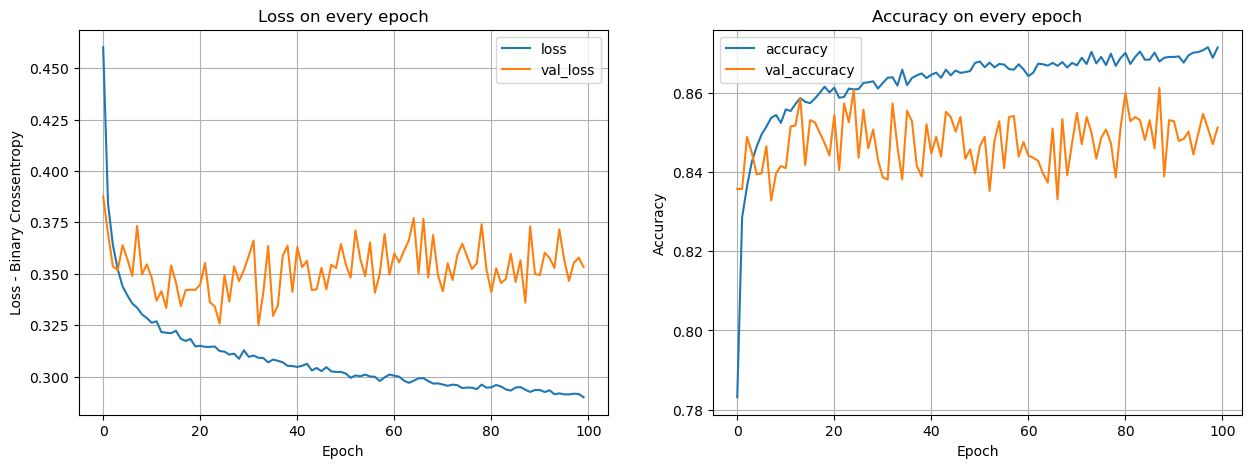

119/119 [==============================] - 0s 813us/step - loss: 0.3533 - accuracy: 0.8512
num_nodes: 16, droupout_prob: 0, learningrate: 0.001, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951F7C1710>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

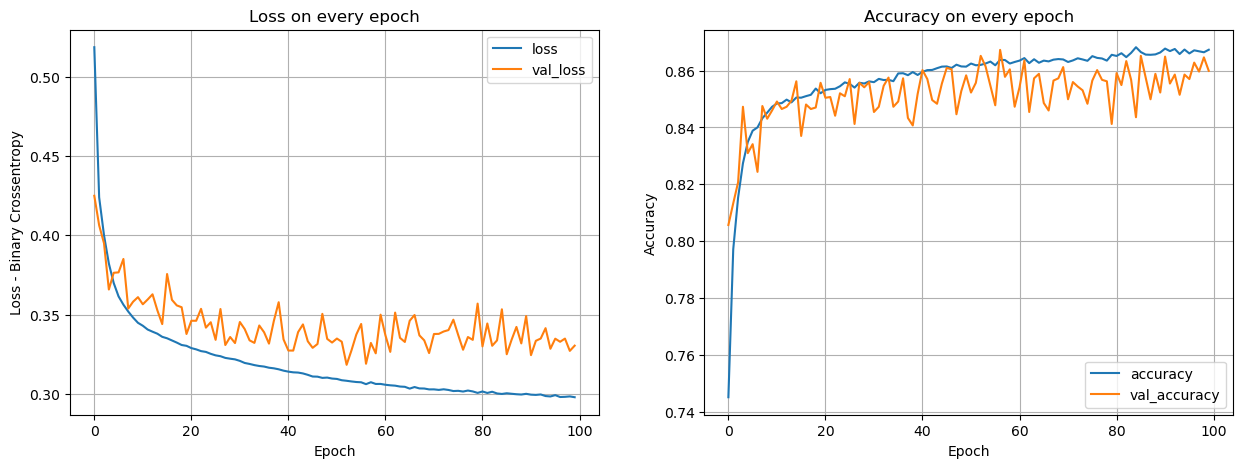

119/119 [==============================] - 0s 843us/step - loss: 0.3304 - accuracy: 0.8599
num_nodes: 16, droupout_prob: 0, learningrate: 0.001, batch_size: 64
History object: <keras.callbacks.History object at 0x00000195207E2710>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

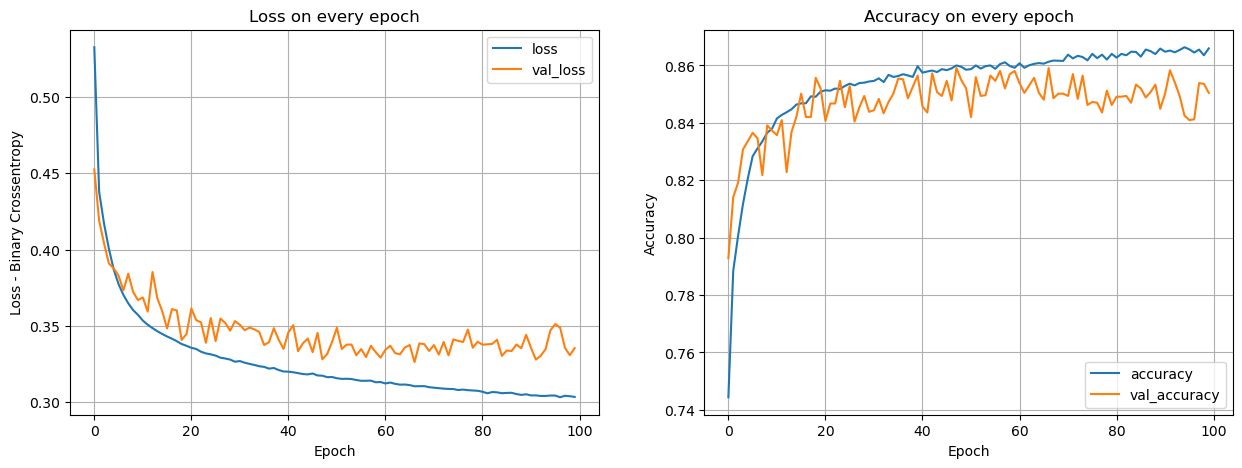

119/119 [==============================] - 0s 902us/step - loss: 0.3354 - accuracy: 0.8504
num_nodes: 16, droupout_prob: 0, learningrate: 0.001, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951F4E84D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

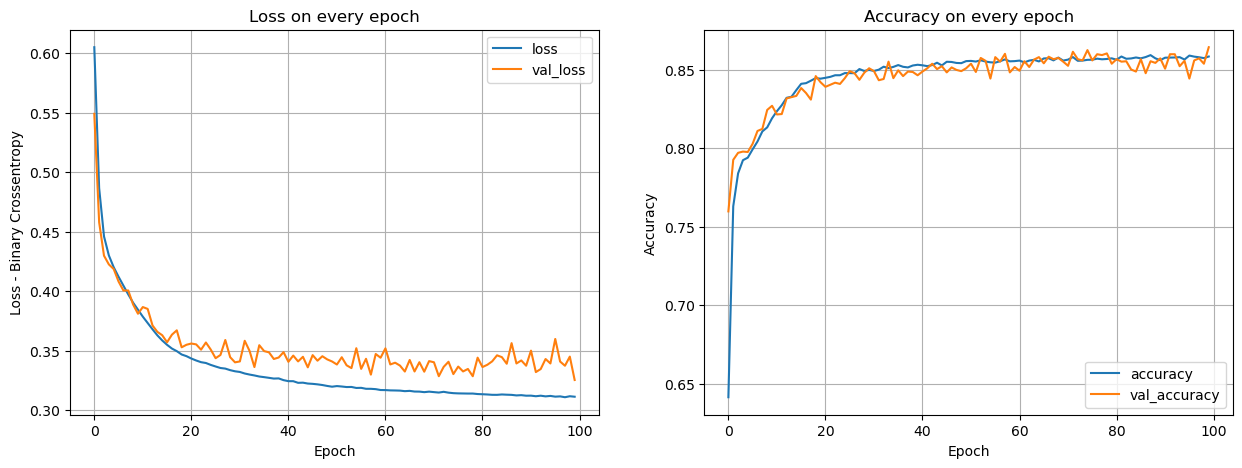

119/119 [==============================] - 0s 776us/step - loss: 0.3255 - accuracy: 0.8644
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.01, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951EC80990>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

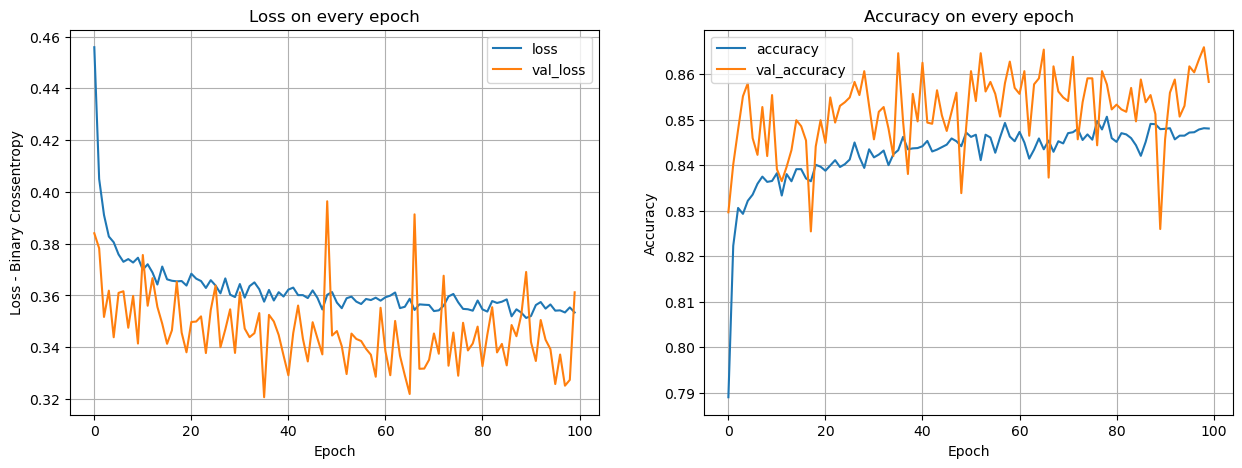

119/119 [==============================] - 0s 773us/step - loss: 0.3612 - accuracy: 0.8583
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.01, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951D2AF9D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

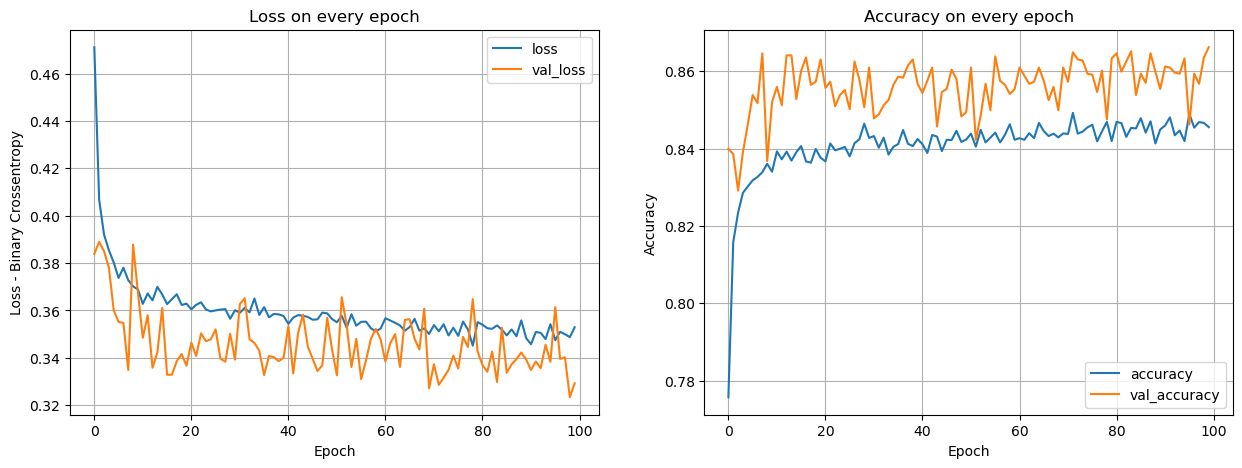

119/119 [==============================] - 0s 803us/step - loss: 0.3293 - accuracy: 0.8662
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.01, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019517D2A590>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

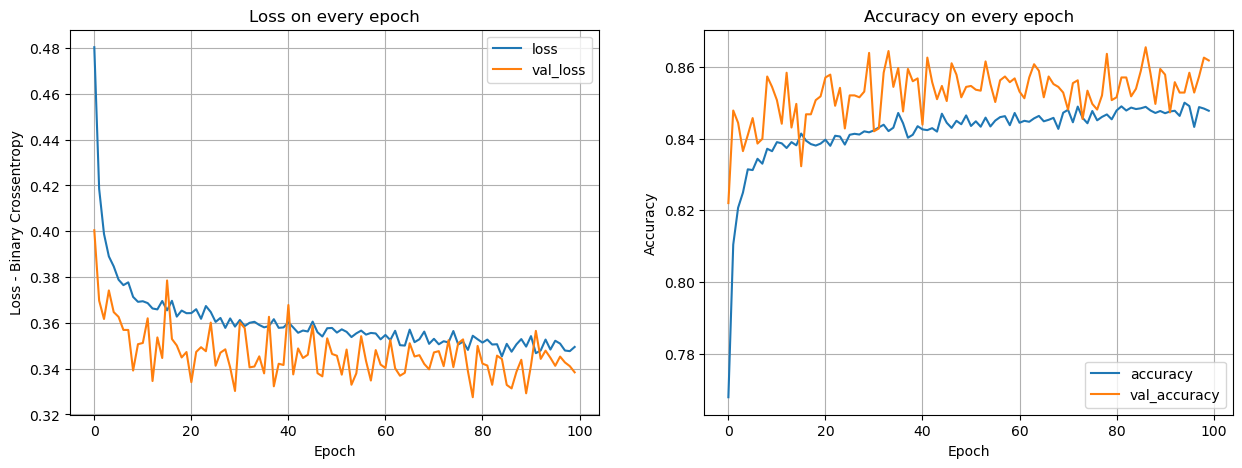

119/119 [==============================] - 0s 882us/step - loss: 0.3384 - accuracy: 0.8617
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.005, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019519F1BE10>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

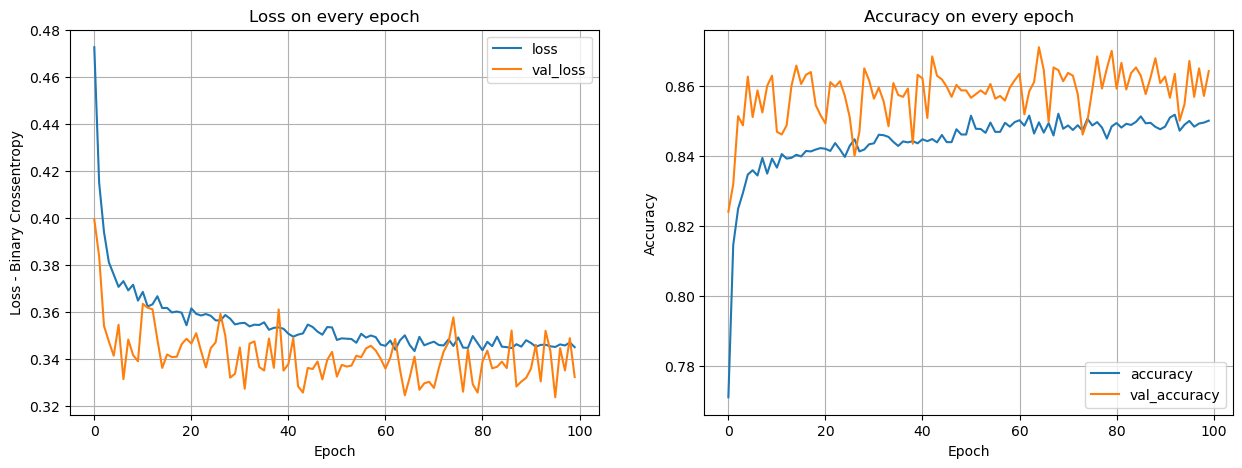

119/119 [==============================] - 0s 884us/step - loss: 0.3323 - accuracy: 0.8644
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.005, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951B6A6990>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

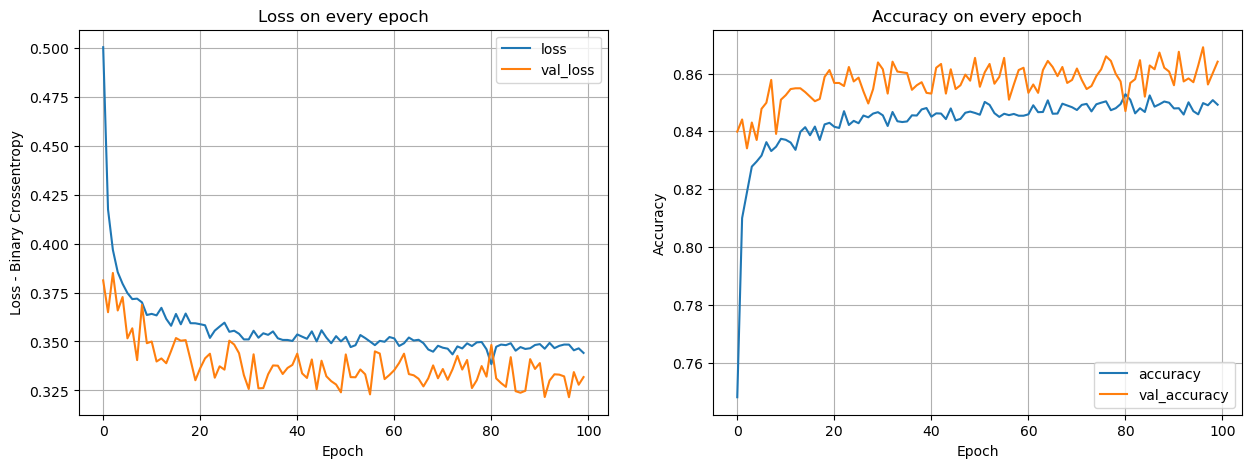

119/119 [==============================] - 0s 815us/step - loss: 0.3318 - accuracy: 0.8641
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.005, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019524980710>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

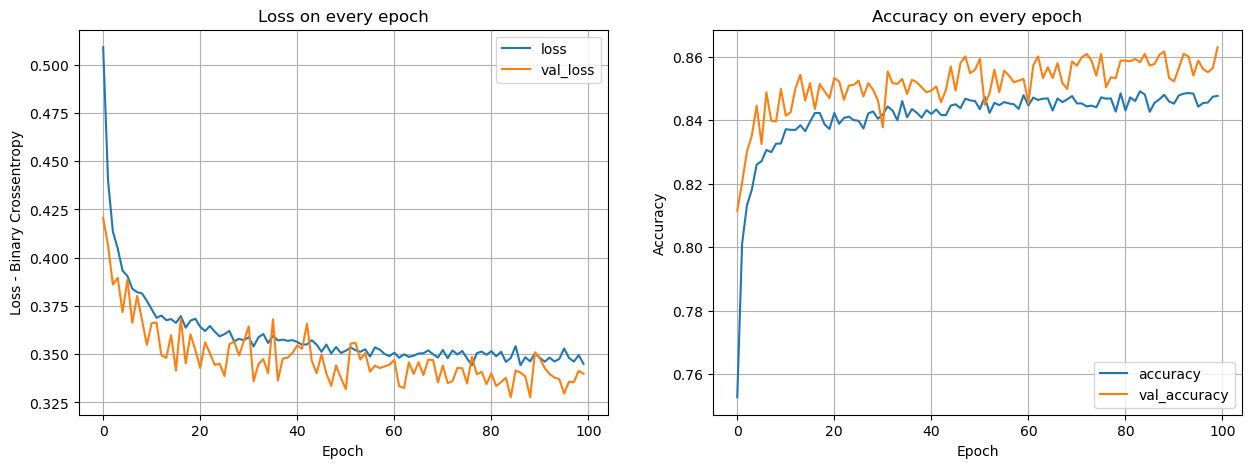

119/119 [==============================] - 0s 827us/step - loss: 0.3399 - accuracy: 0.8630
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.001, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019527168C90>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

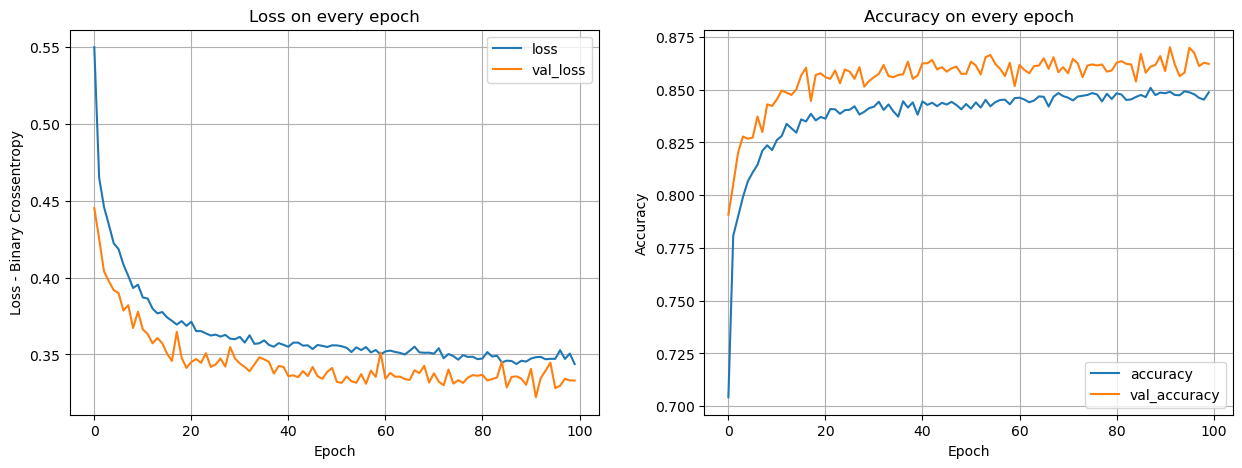

119/119 [==============================] - 0s 853us/step - loss: 0.3331 - accuracy: 0.8623
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.001, batch_size: 64
History object: <keras.callbacks.History object at 0x0000019517725ED0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

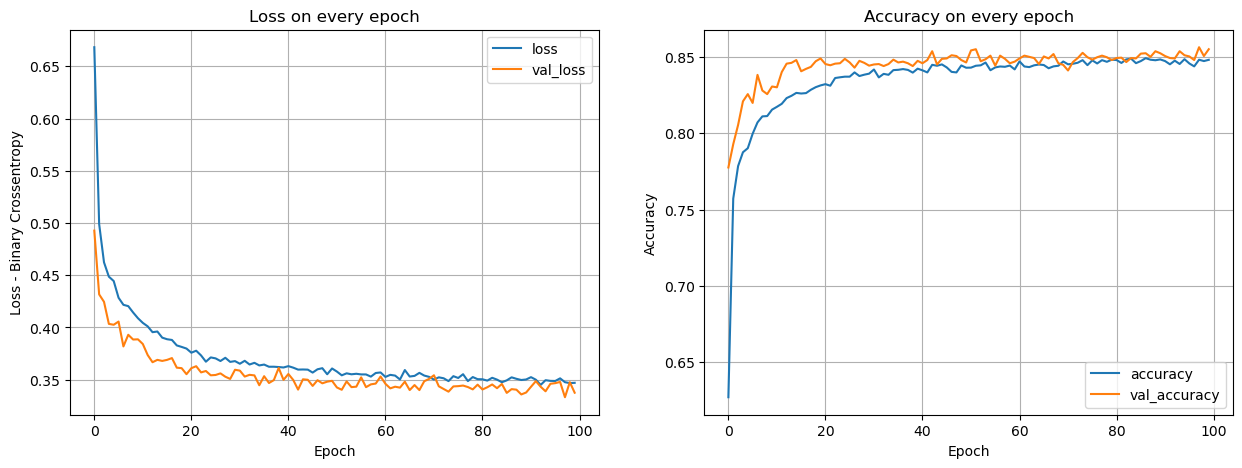

119/119 [==============================] - 0s 849us/step - loss: 0.3376 - accuracy: 0.8552
num_nodes: 16, droupout_prob: 0.2, learningrate: 0.001, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019524937090>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

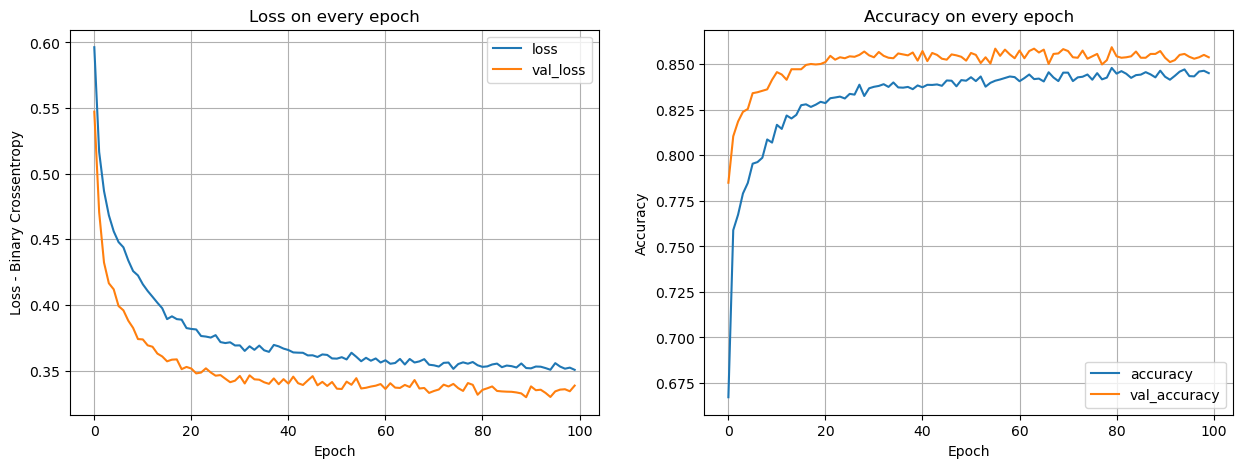

119/119 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8538
num_nodes: 32, droupout_prob: 0, learningrate: 0.01, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951A051490>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin

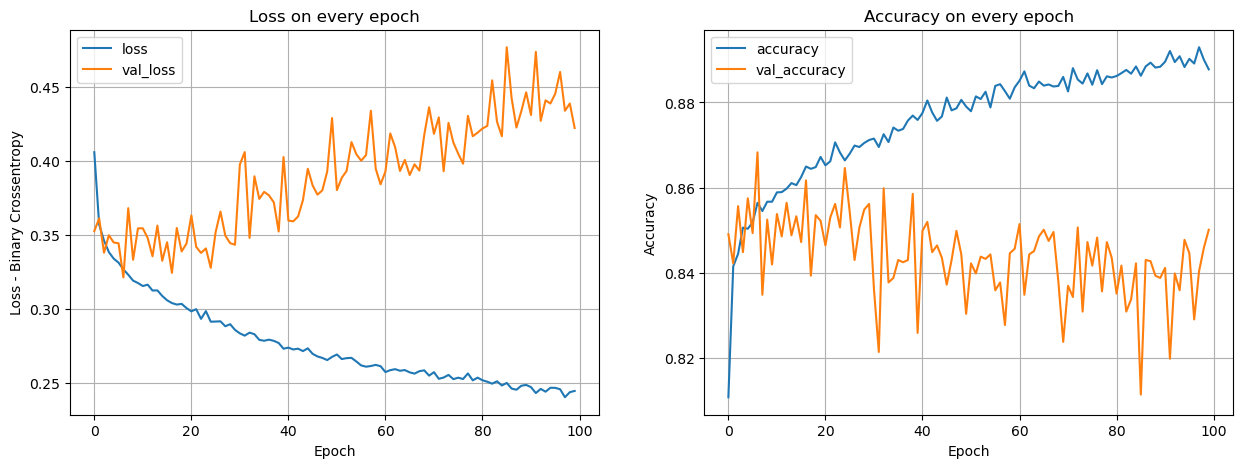

119/119 [==============================] - 0s 837us/step - loss: 0.4223 - accuracy: 0.8502
num_nodes: 32, droupout_prob: 0, learningrate: 0.01, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951791C190>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_beg

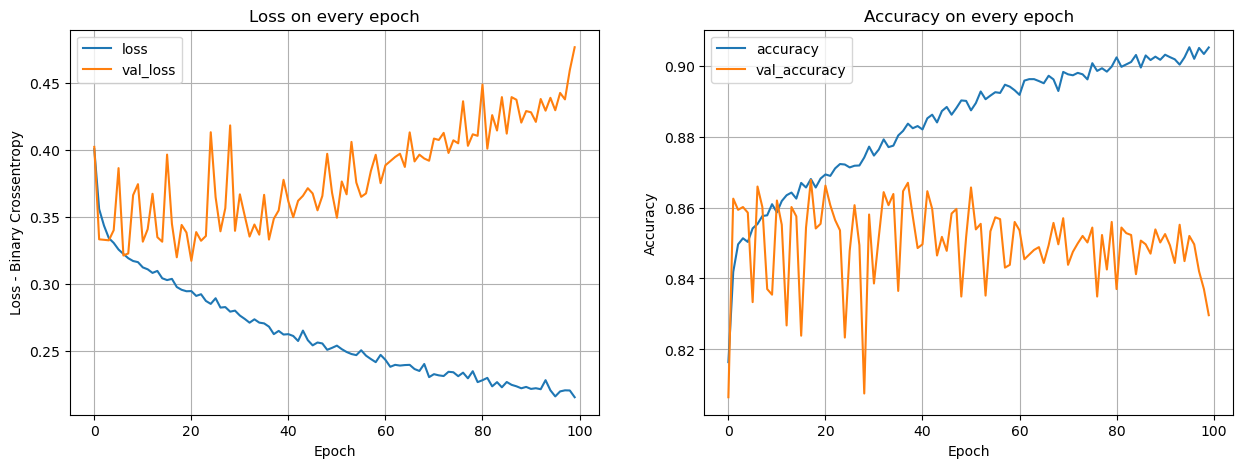

119/119 [==============================] - 0s 882us/step - loss: 0.4769 - accuracy: 0.8297
num_nodes: 32, droupout_prob: 0, learningrate: 0.01, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019517994DD0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

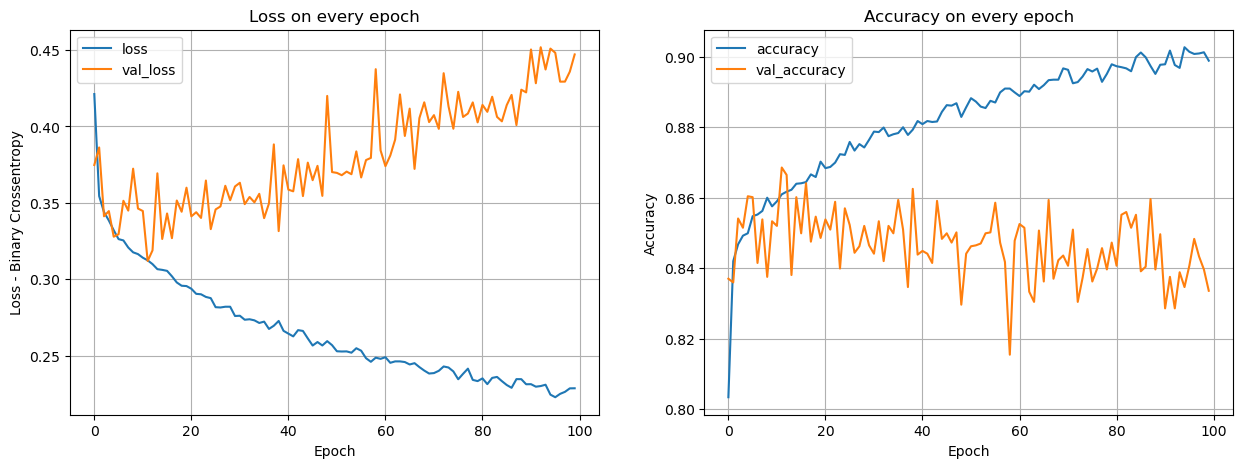

119/119 [==============================] - 0s 850us/step - loss: 0.4471 - accuracy: 0.8336
num_nodes: 32, droupout_prob: 0, learningrate: 0.005, batch_size: 32
History object: <keras.callbacks.History object at 0x00000195204ED310>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

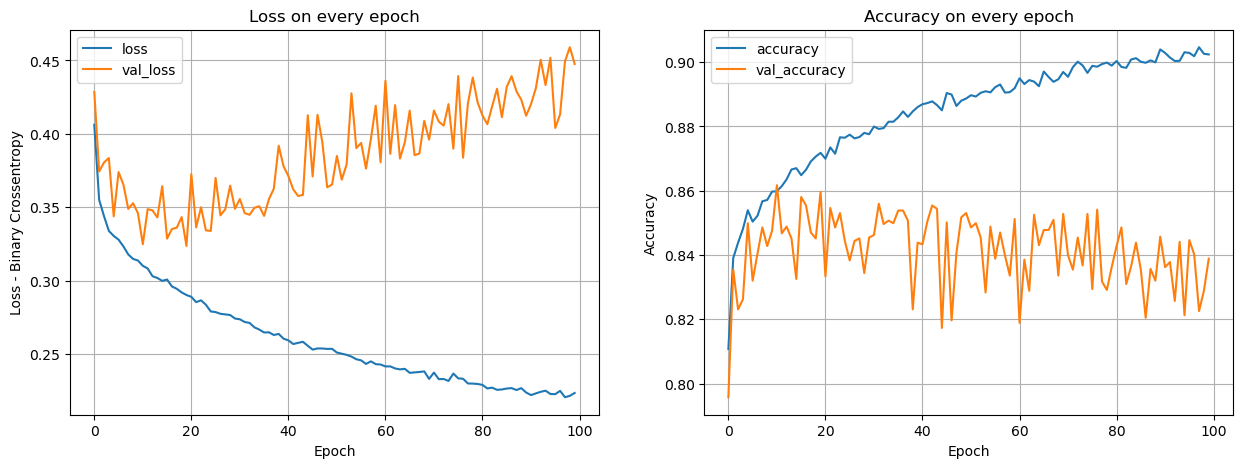

119/119 [==============================] - 0s 803us/step - loss: 0.4476 - accuracy: 0.8389
num_nodes: 32, droupout_prob: 0, learningrate: 0.005, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951EFBEA10>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

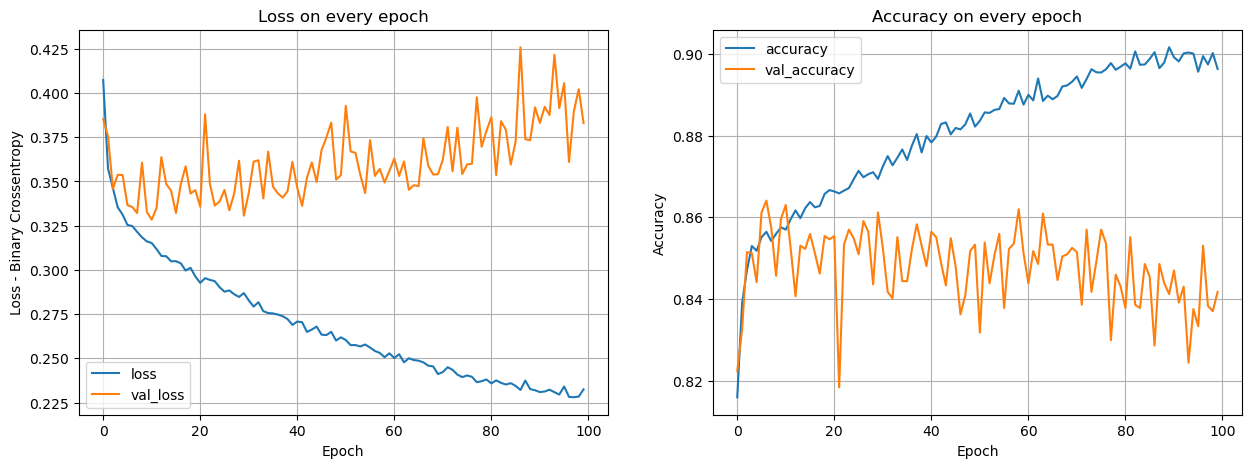

119/119 [==============================] - 0s 822us/step - loss: 0.3830 - accuracy: 0.8417
num_nodes: 32, droupout_prob: 0, learningrate: 0.005, batch_size: 128
History object: <keras.callbacks.History object at 0x00000195246CCA50>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

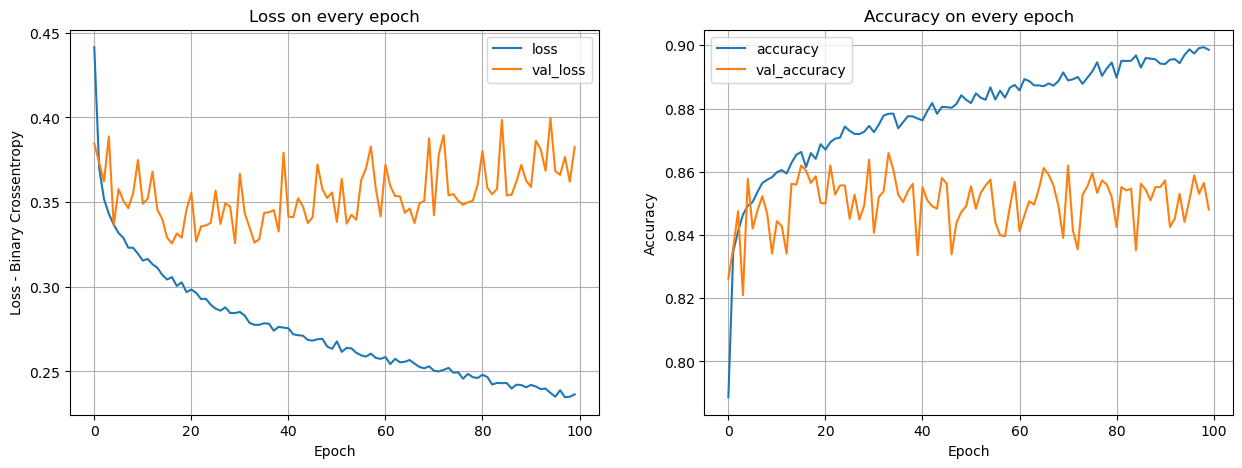

119/119 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8481
num_nodes: 32, droupout_prob: 0, learningrate: 0.001, batch_size: 32
History object: <keras.callbacks.History object at 0x000001952CFEE490>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begi

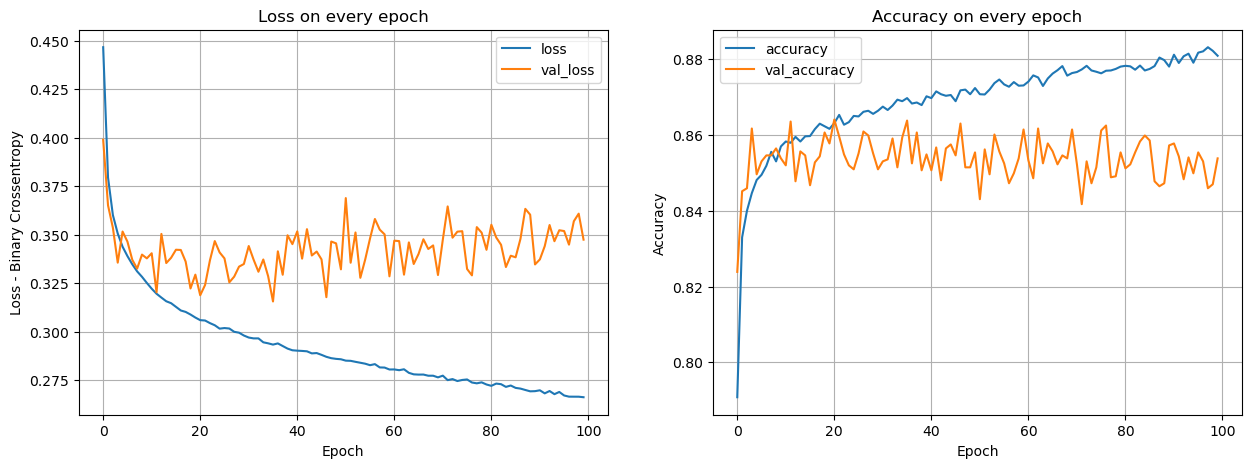

119/119 [==============================] - 0s 752us/step - loss: 0.3475 - accuracy: 0.8538
num_nodes: 32, droupout_prob: 0, learningrate: 0.001, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951E19C5D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

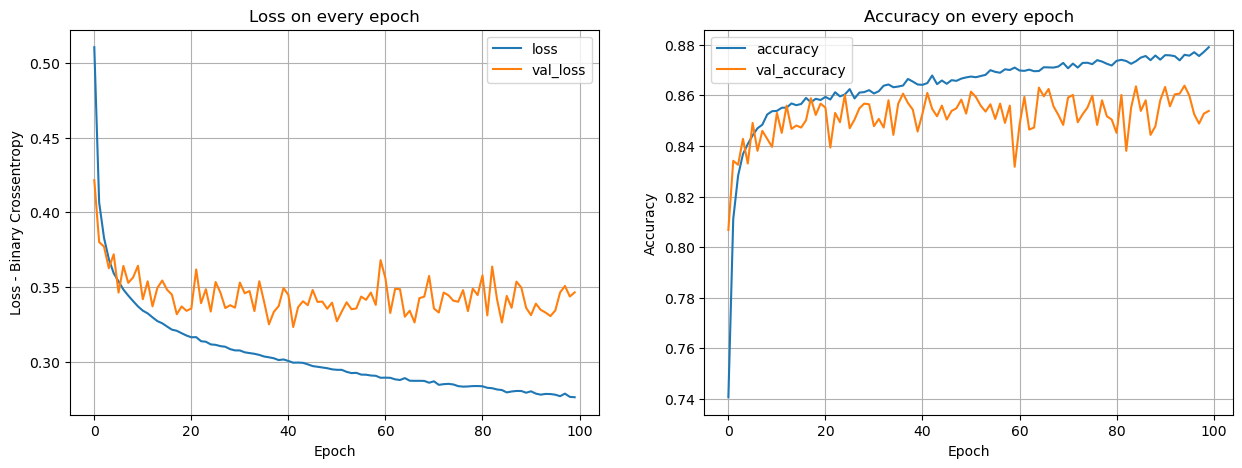

119/119 [==============================] - 0s 845us/step - loss: 0.3463 - accuracy: 0.8538
num_nodes: 32, droupout_prob: 0, learningrate: 0.001, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951F4B9AD0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

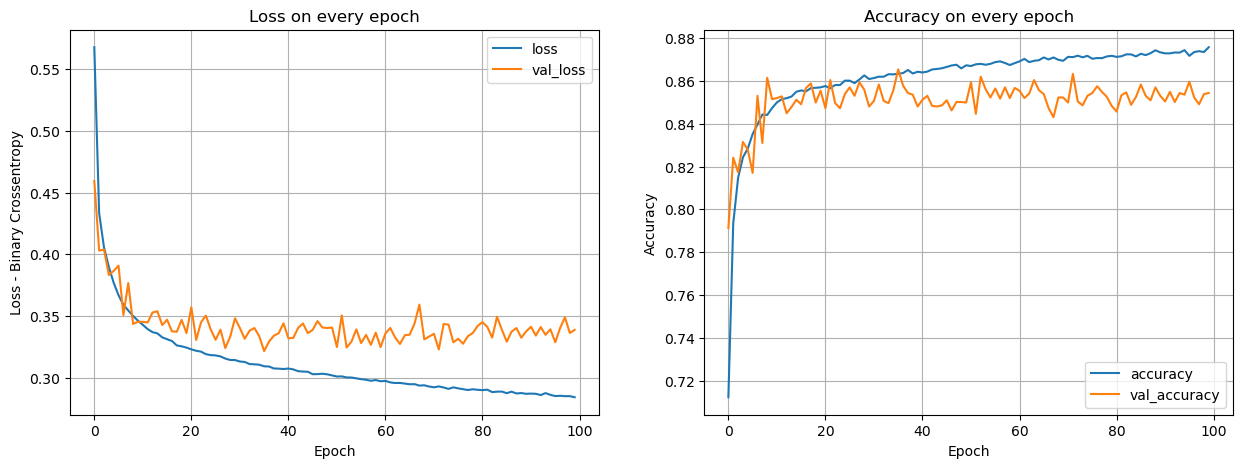

119/119 [==============================] - 0s 869us/step - loss: 0.3388 - accuracy: 0.8544
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.01, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951E26B9D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

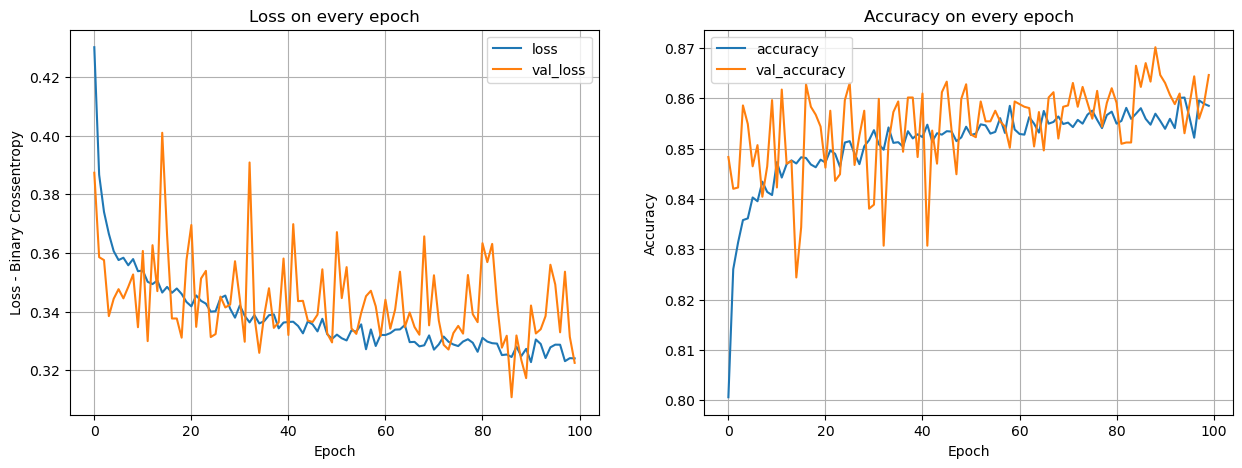

119/119 [==============================] - 0s 820us/step - loss: 0.3225 - accuracy: 0.8646
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.01, batch_size: 64
History object: <keras.callbacks.History object at 0x0000019517D69F10>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

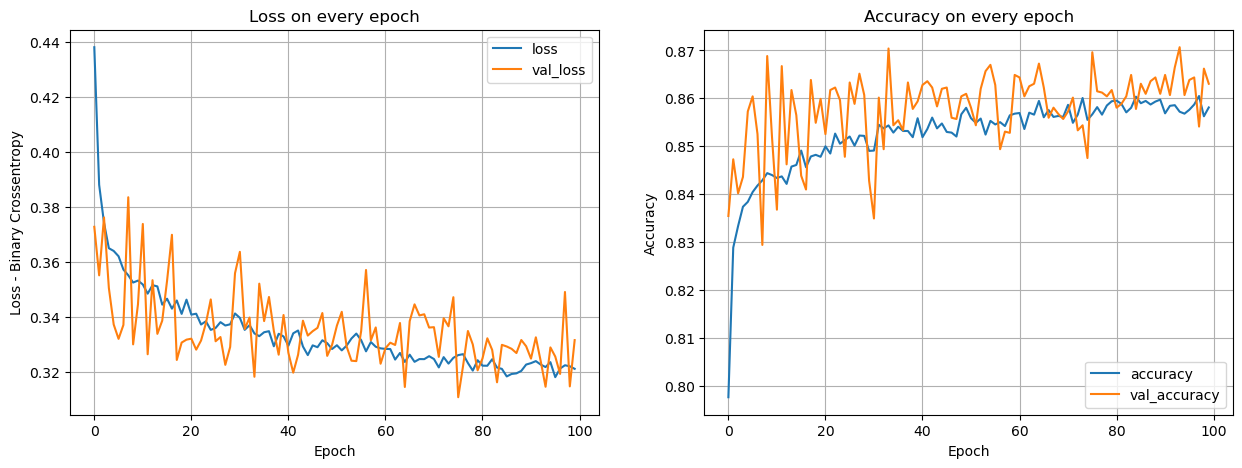

119/119 [==============================] - 0s 843us/step - loss: 0.3315 - accuracy: 0.8630
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.01, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951A021550>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

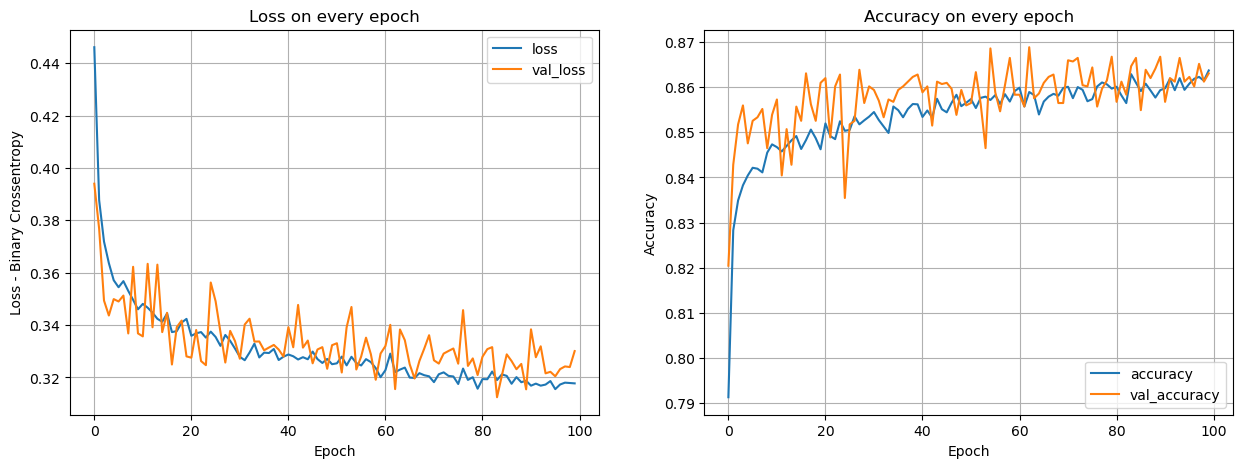

119/119 [==============================] - 0s 826us/step - loss: 0.3301 - accuracy: 0.8630
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.005, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019518F29750>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

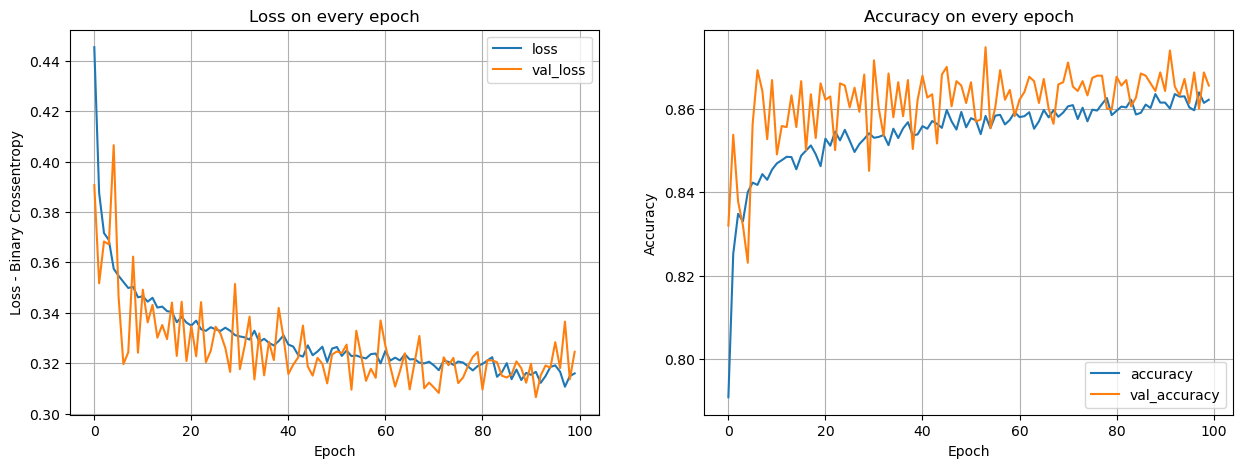

119/119 [==============================] - 0s 879us/step - loss: 0.3245 - accuracy: 0.8657
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.005, batch_size: 64
History object: <keras.callbacks.History object at 0x0000019527137610>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

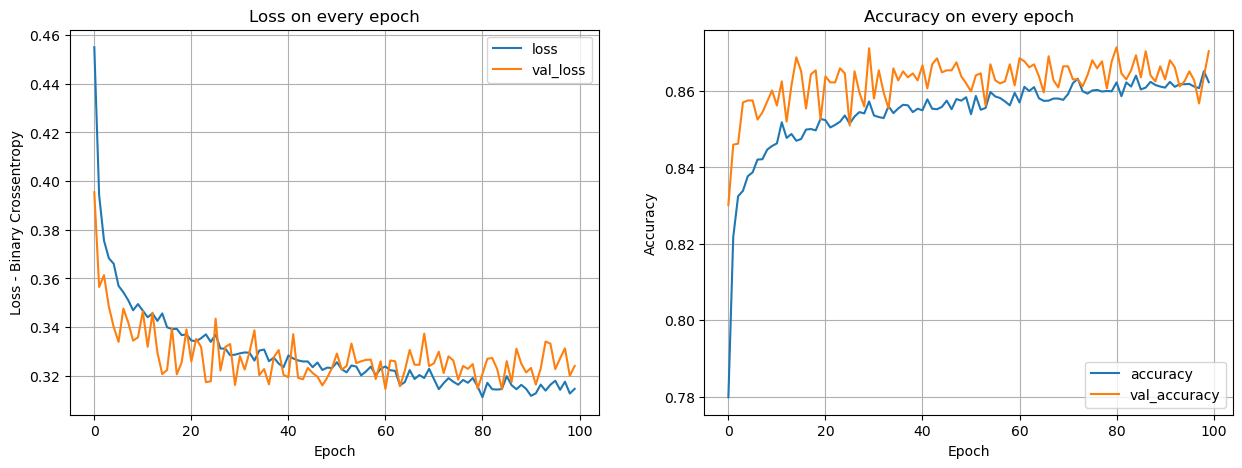

119/119 [==============================] - 0s 924us/step - loss: 0.3241 - accuracy: 0.8704
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.005, batch_size: 128
History object: <keras.callbacks.History object at 0x00000195179694D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

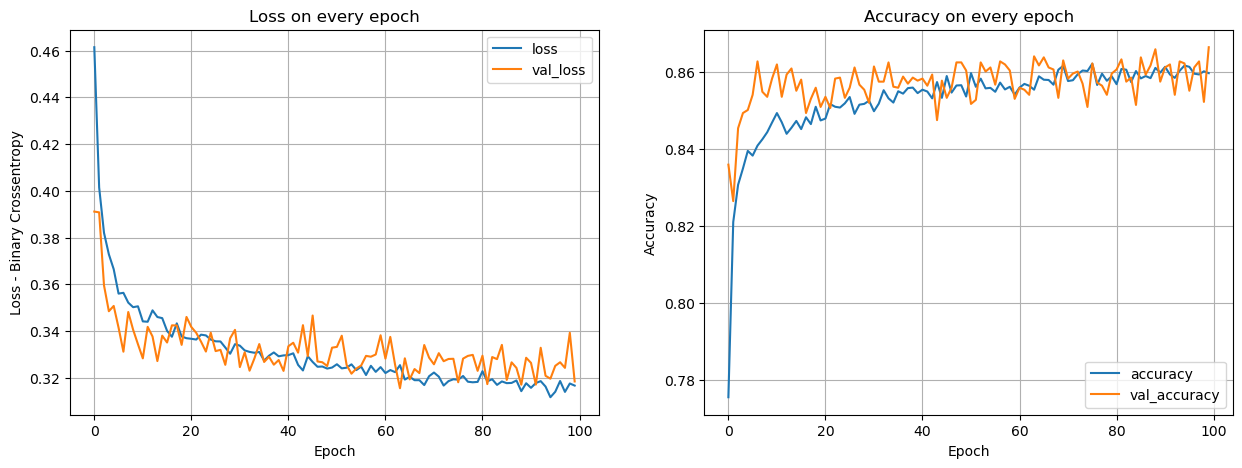

119/119 [==============================] - 0s 864us/step - loss: 0.3185 - accuracy: 0.8665
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.001, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019517756090>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

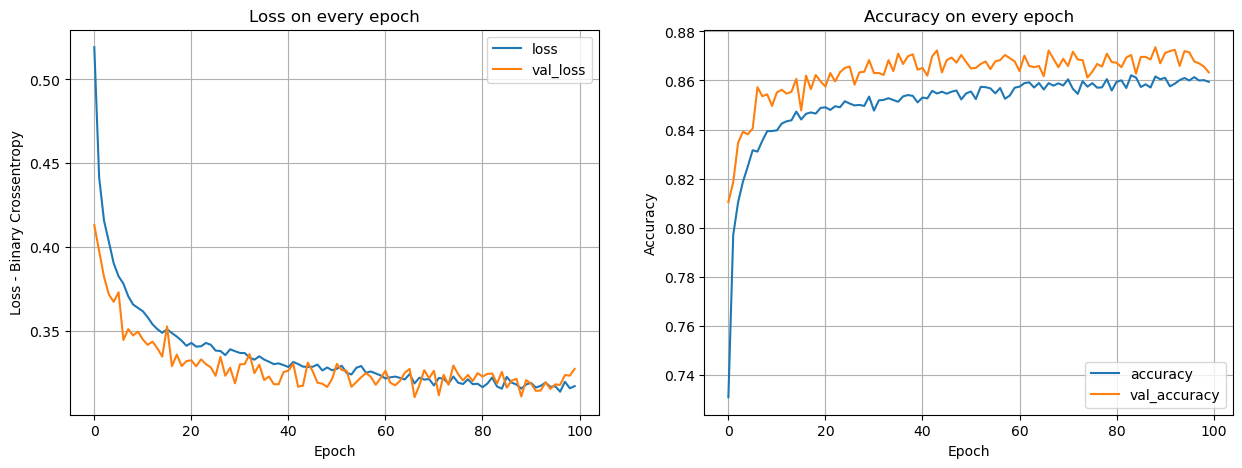

119/119 [==============================] - 0s 825us/step - loss: 0.3274 - accuracy: 0.8633
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.001, batch_size: 64
History object: <keras.callbacks.History object at 0x0000019526EF6C50>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

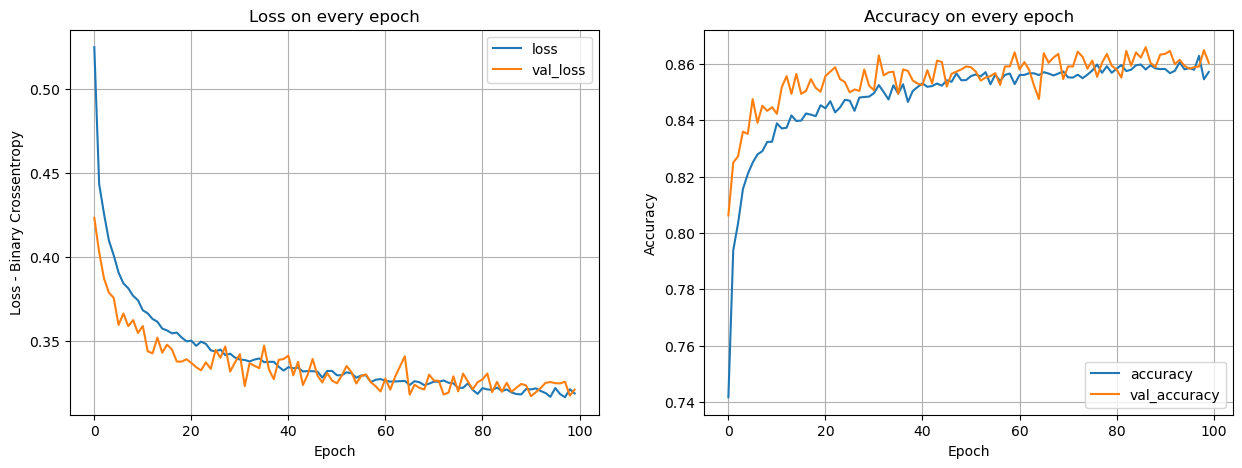

119/119 [==============================] - 0s 820us/step - loss: 0.3209 - accuracy: 0.8604
num_nodes: 32, droupout_prob: 0.2, learningrate: 0.001, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951A025090>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

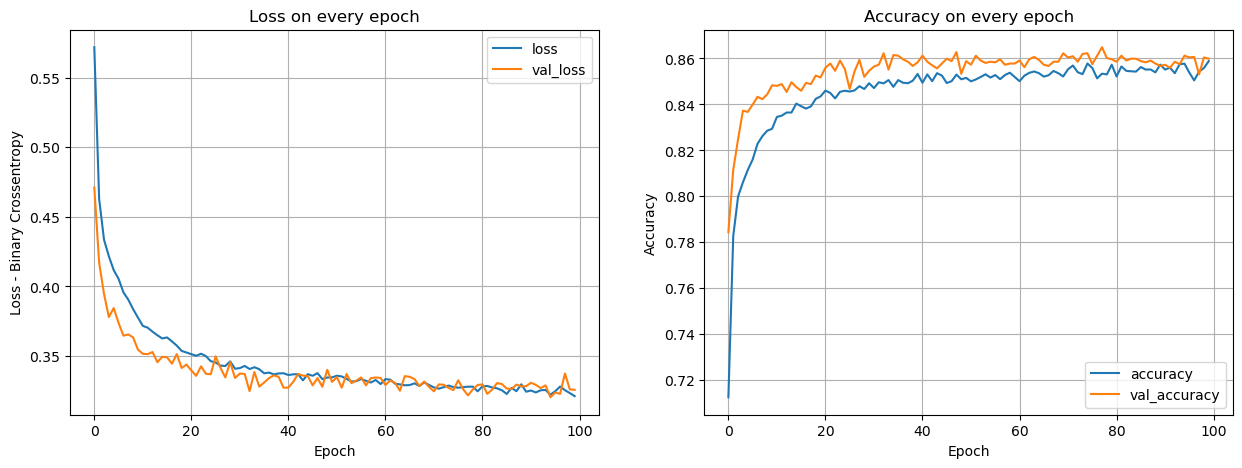

119/119 [==============================] - 0s 871us/step - loss: 0.3258 - accuracy: 0.8599
num_nodes: 64, droupout_prob: 0, learningrate: 0.01, batch_size: 32
History object: <keras.callbacks.History object at 0x00000195271FED90>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_beg

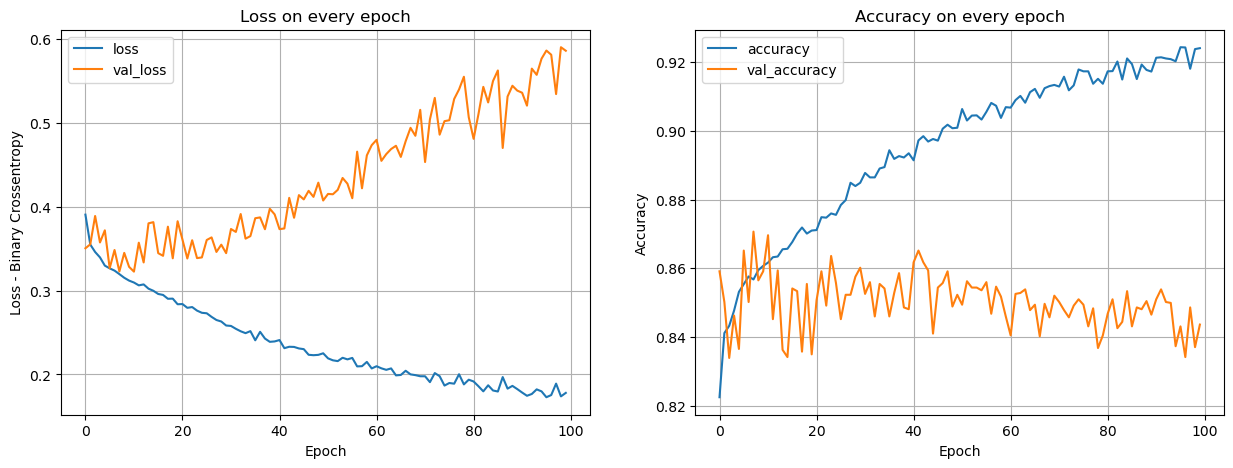

119/119 [==============================] - 0s 909us/step - loss: 0.5863 - accuracy: 0.8436
num_nodes: 64, droupout_prob: 0, learningrate: 0.01, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951EFD53D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_beg

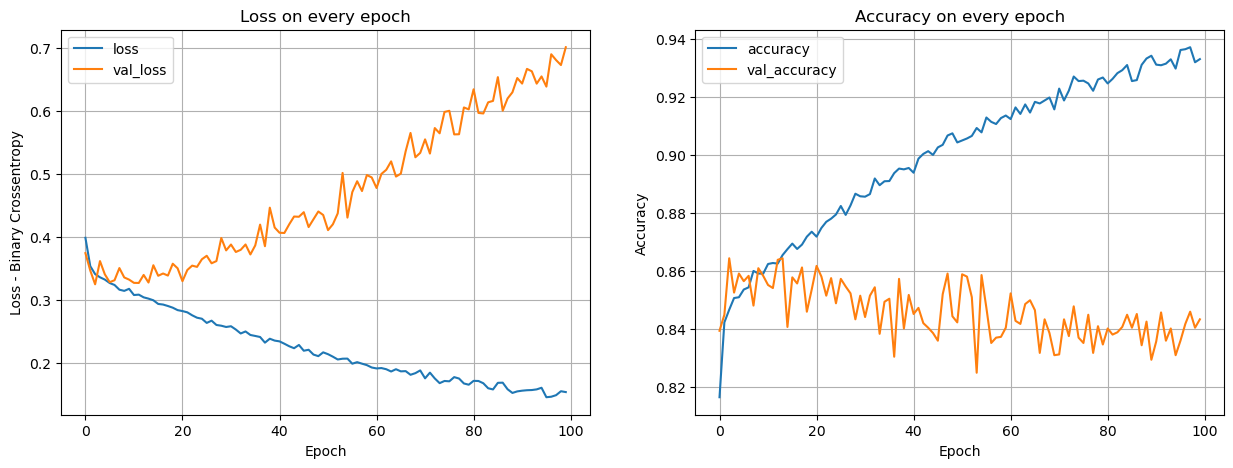

119/119 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.8433
num_nodes: 64, droupout_prob: 0, learningrate: 0.01, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951EFEEA10>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begi

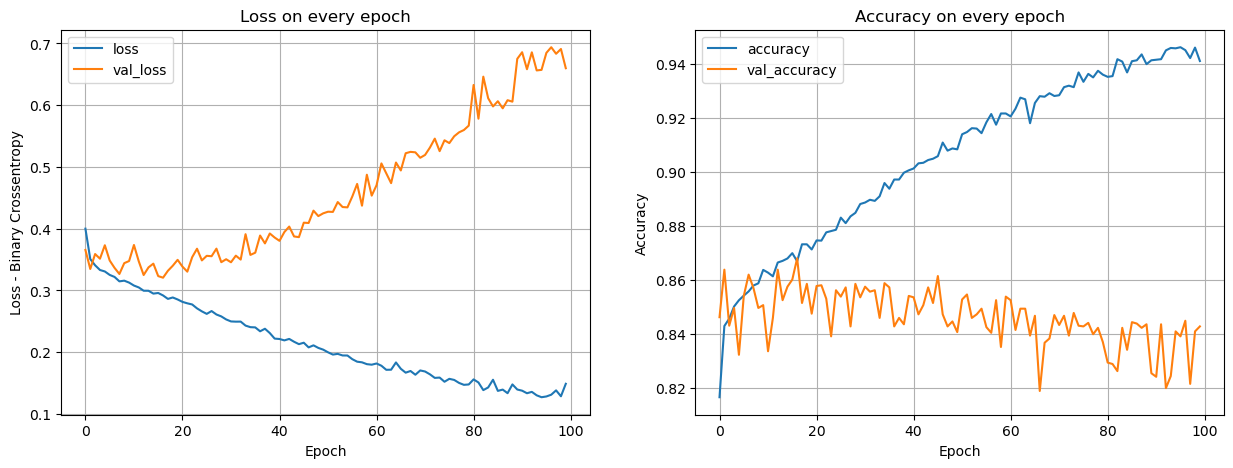

119/119 [==============================] - 0s 858us/step - loss: 0.6598 - accuracy: 0.8428
num_nodes: 64, droupout_prob: 0, learningrate: 0.005, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951EF55410>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

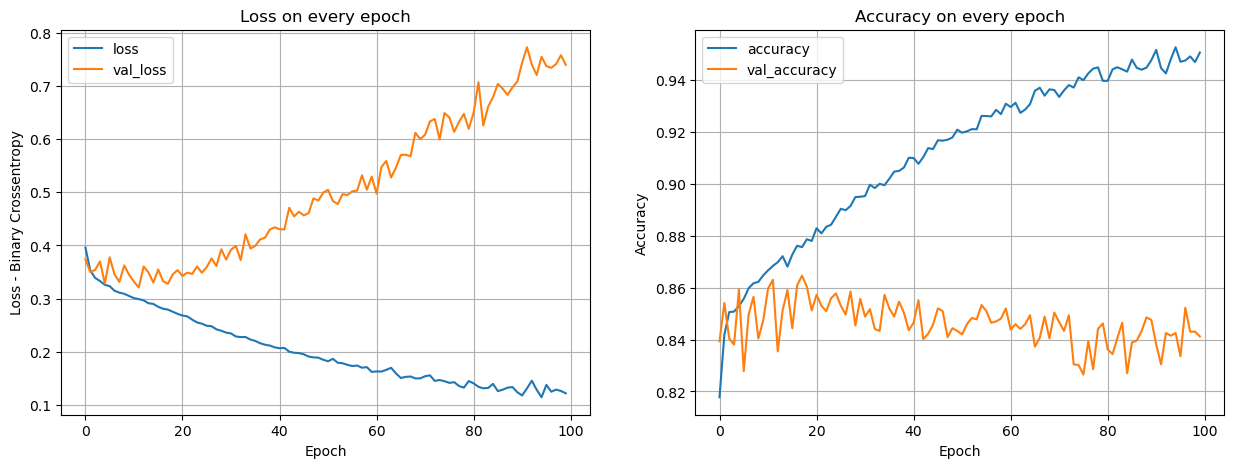

119/119 [==============================] - 0s 855us/step - loss: 0.7399 - accuracy: 0.8412
num_nodes: 64, droupout_prob: 0, learningrate: 0.005, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951F3EEBD0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

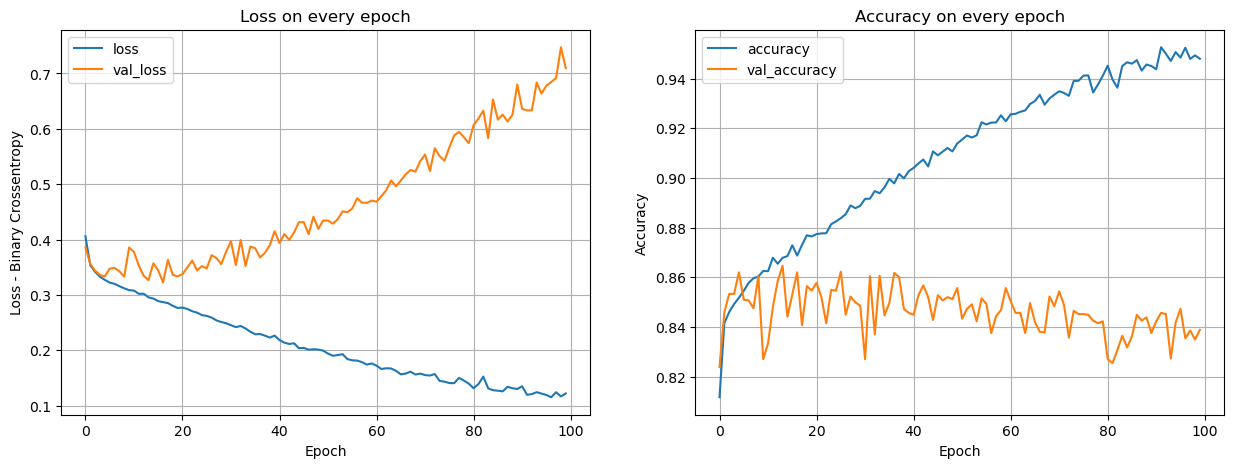

119/119 [==============================] - 0s 934us/step - loss: 0.7096 - accuracy: 0.8389
num_nodes: 64, droupout_prob: 0, learningrate: 0.005, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951F465450>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

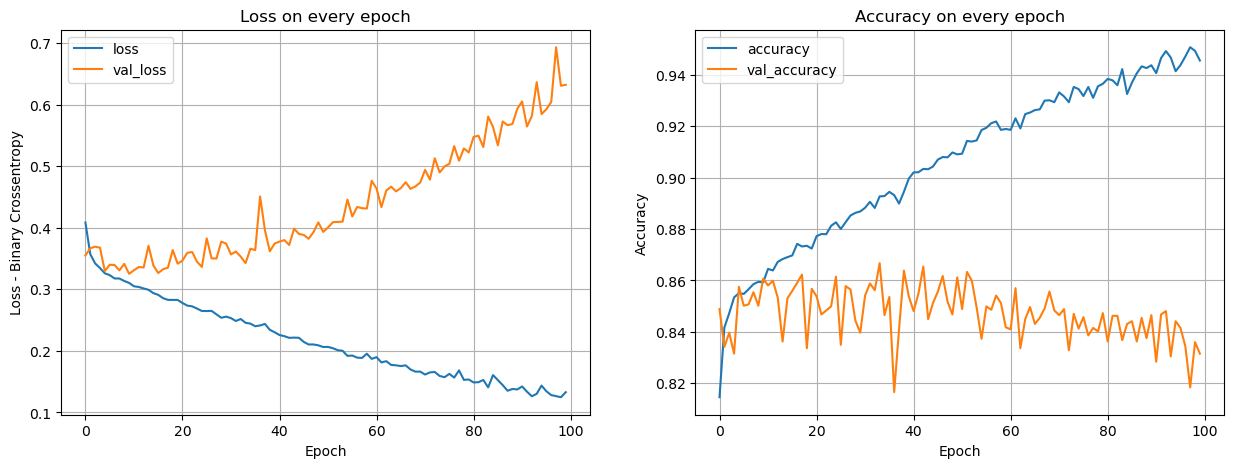

119/119 [==============================] - 0s 810us/step - loss: 0.6325 - accuracy: 0.8315
num_nodes: 64, droupout_prob: 0, learningrate: 0.001, batch_size: 32
History object: <keras.callbacks.History object at 0x00000195207A7ED0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

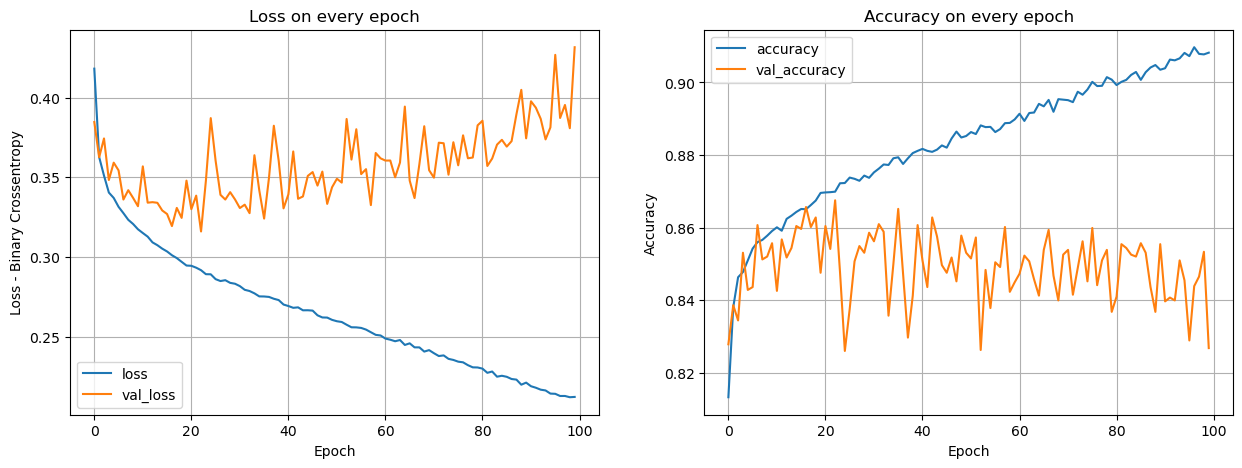

119/119 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8268
num_nodes: 64, droupout_prob: 0, learningrate: 0.001, batch_size: 64
History object: <keras.callbacks.History object at 0x000001952CF42BD0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begi

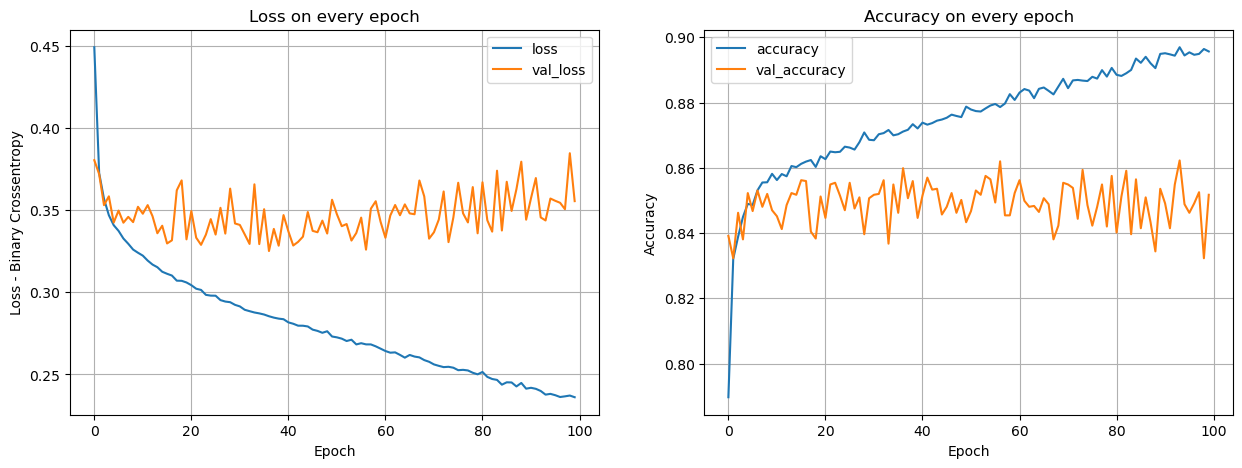

119/119 [==============================] - 0s 845us/step - loss: 0.3554 - accuracy: 0.8517
num_nodes: 64, droupout_prob: 0, learningrate: 0.001, batch_size: 128
History object: <keras.callbacks.History object at 0x000001952CF242D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

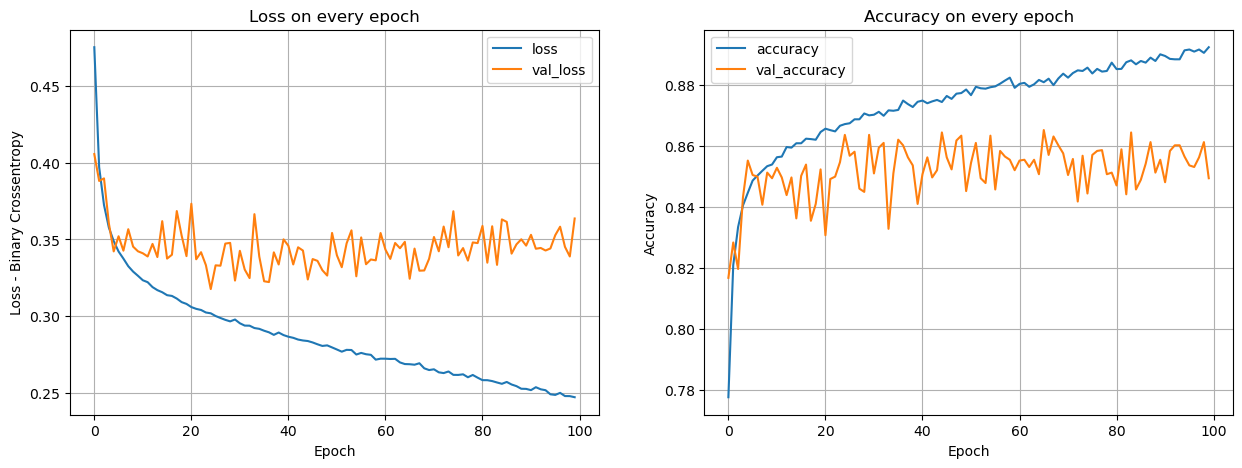

119/119 [==============================] - 0s 985us/step - loss: 0.3637 - accuracy: 0.8494
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.01, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019517E02890>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

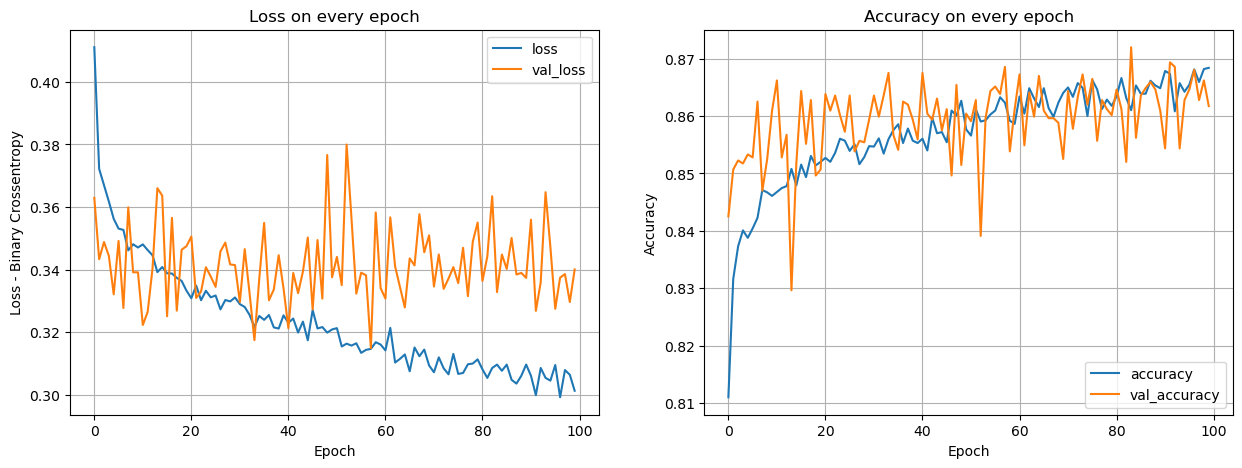

119/119 [==============================] - 0s 958us/step - loss: 0.3400 - accuracy: 0.8617
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.01, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951E1CA450>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

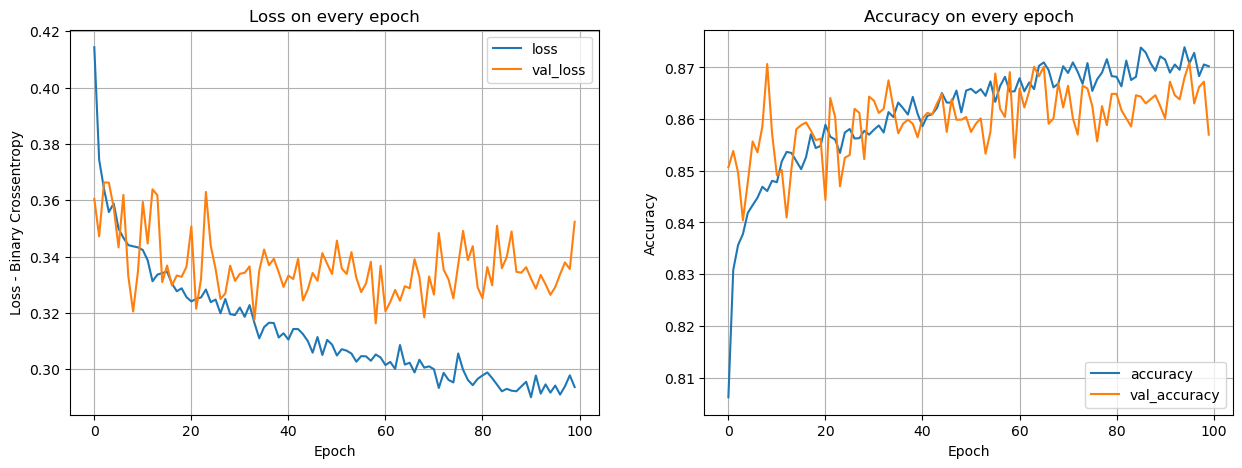

119/119 [==============================] - 0s 933us/step - loss: 0.3523 - accuracy: 0.8570
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.01, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019526DC21D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

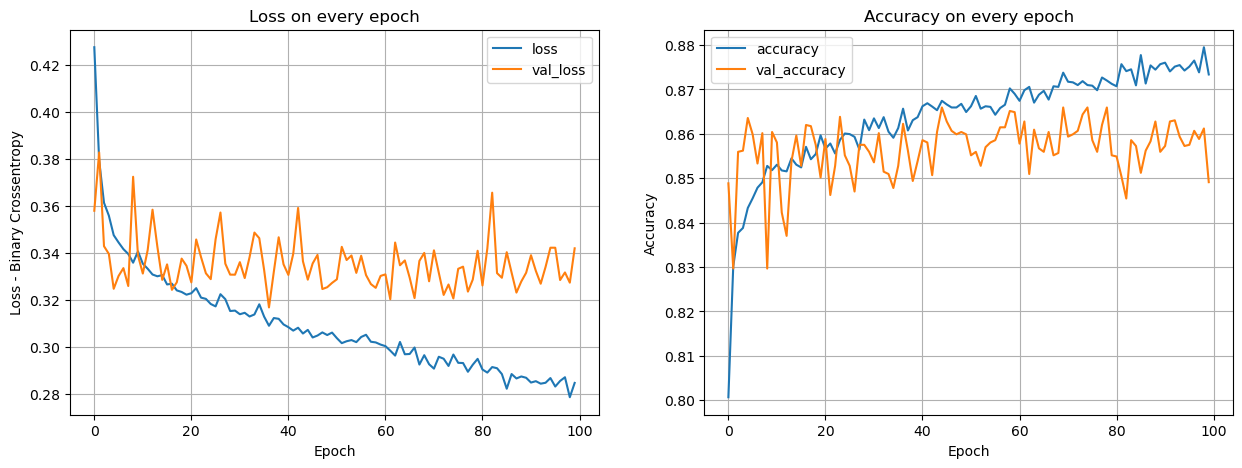

119/119 [==============================] - 0s 854us/step - loss: 0.3420 - accuracy: 0.8491
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.005, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951E3233D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

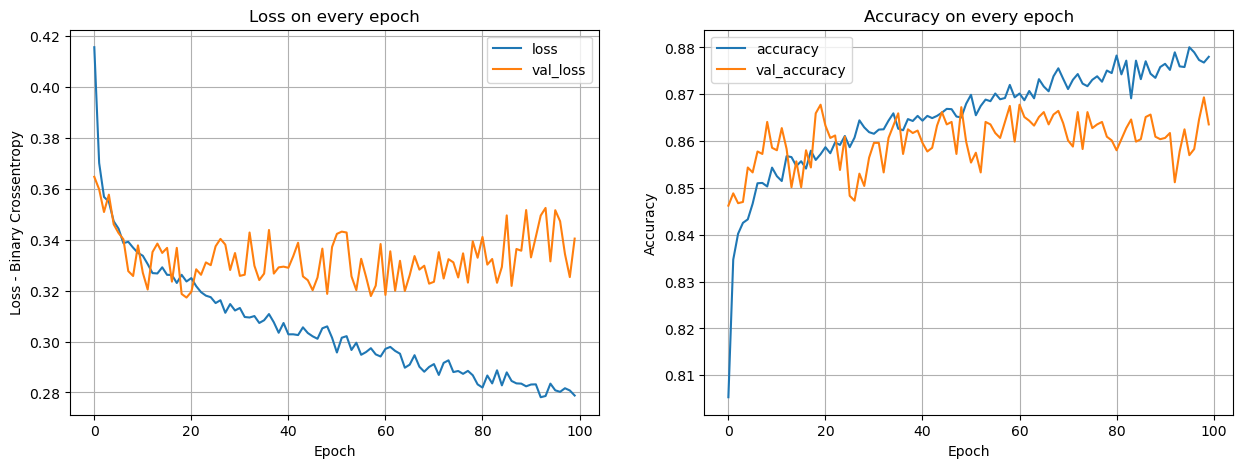

119/119 [==============================] - 0s 869us/step - loss: 0.3404 - accuracy: 0.8636
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.005, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951E11EC90>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

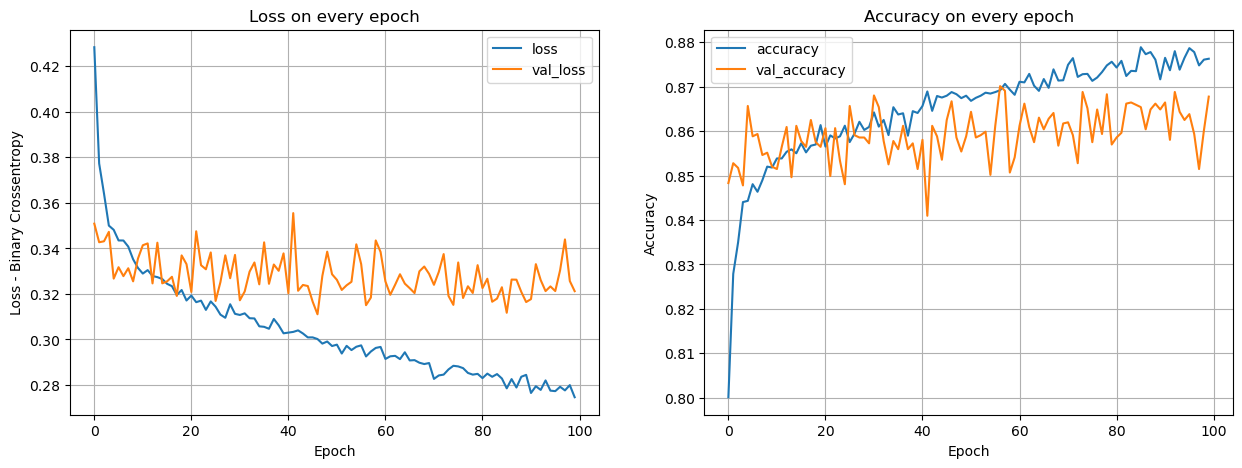

119/119 [==============================] - 0s 992us/step - loss: 0.3212 - accuracy: 0.8678
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.005, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019518FE0750>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

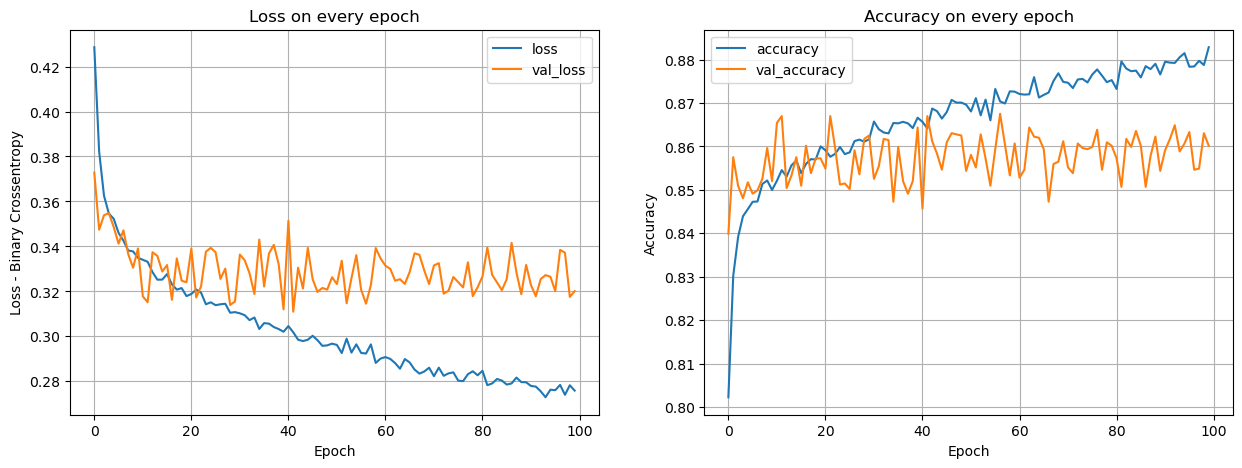

119/119 [==============================] - 0s 804us/step - loss: 0.3201 - accuracy: 0.8601
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.001, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951E2B0E90>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

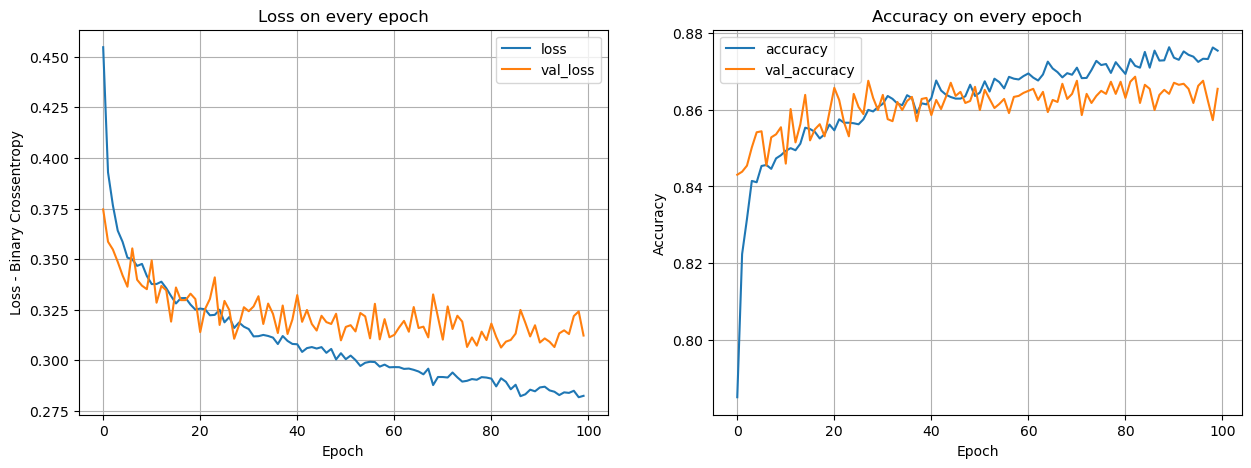

119/119 [==============================] - 0s 819us/step - loss: 0.3122 - accuracy: 0.8654
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.001, batch_size: 64
History object: <keras.callbacks.History object at 0x0000019524687890>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

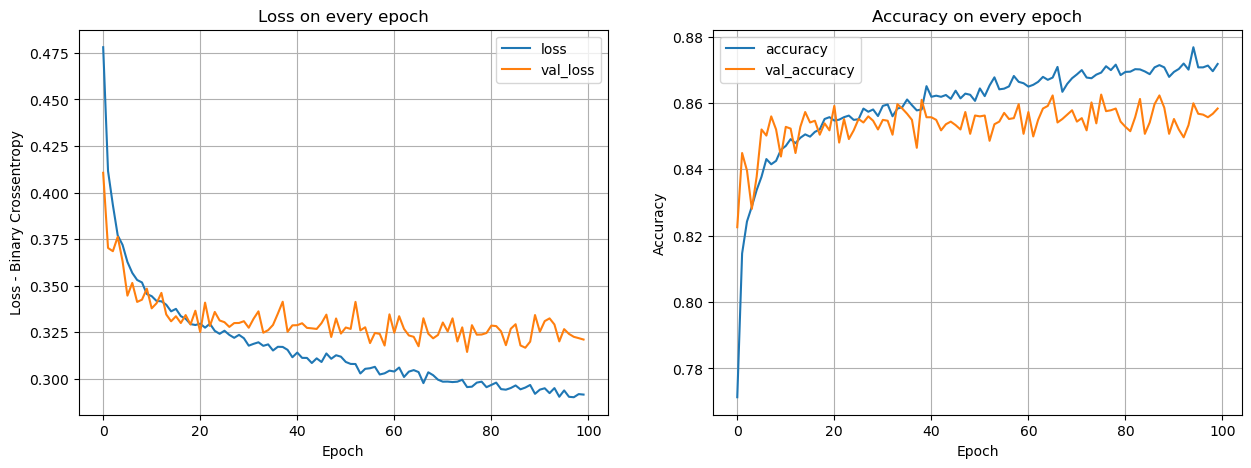

119/119 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8583
num_nodes: 64, droupout_prob: 0.2, learningrate: 0.001, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019518E629D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

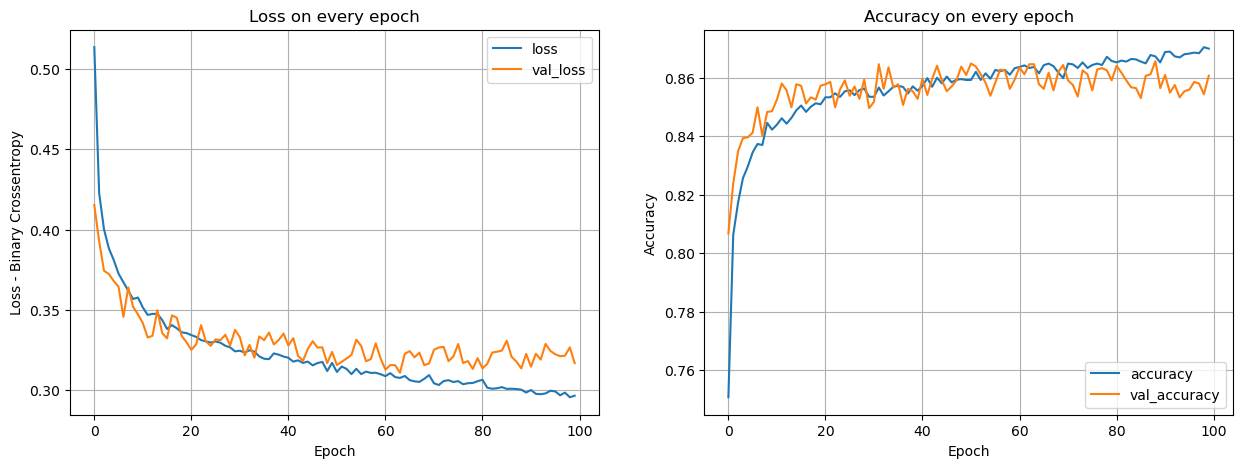

119/119 [==============================] - 0s 856us/step - loss: 0.3169 - accuracy: 0.8607
num_nodes: 128, droupout_prob: 0, learningrate: 0.01, batch_size: 32
History object: <keras.callbacks.History object at 0x000001952CF1DF50>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

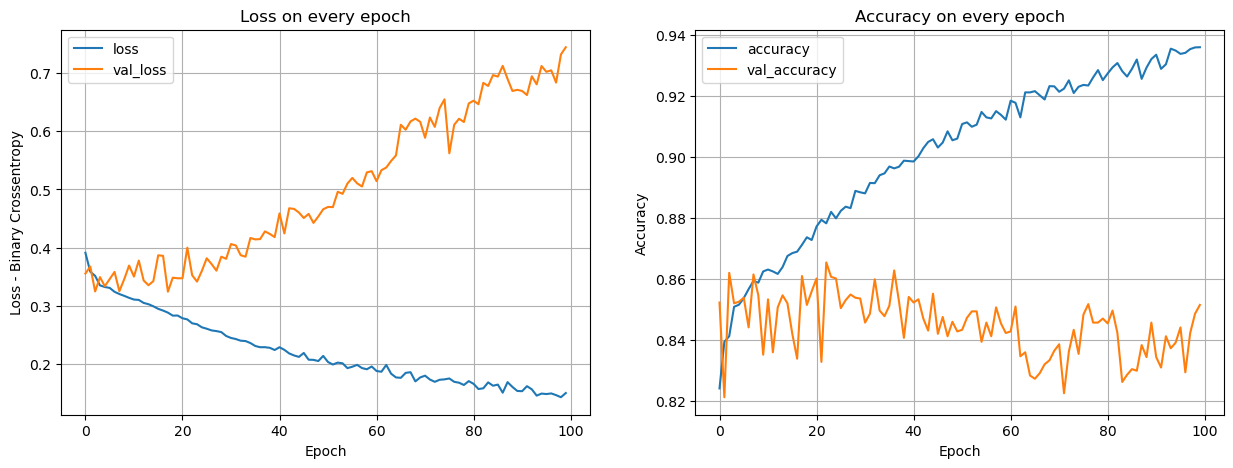

119/119 [==============================] - 0s 888us/step - loss: 0.7446 - accuracy: 0.8515
num_nodes: 128, droupout_prob: 0, learningrate: 0.01, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951ECD2DD0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

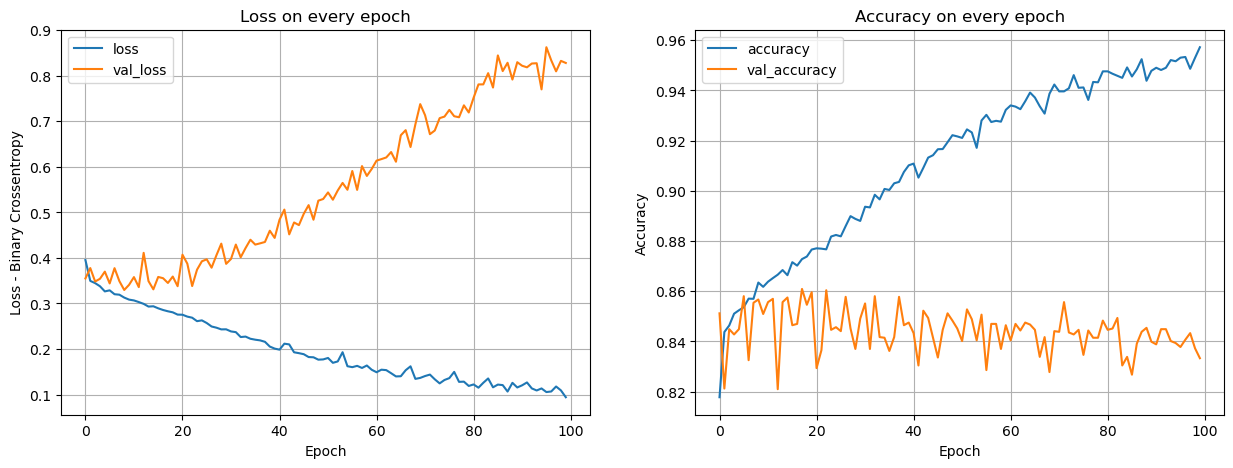

119/119 [==============================] - 0s 920us/step - loss: 0.8282 - accuracy: 0.8333
num_nodes: 128, droupout_prob: 0, learningrate: 0.01, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951E26BF90>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

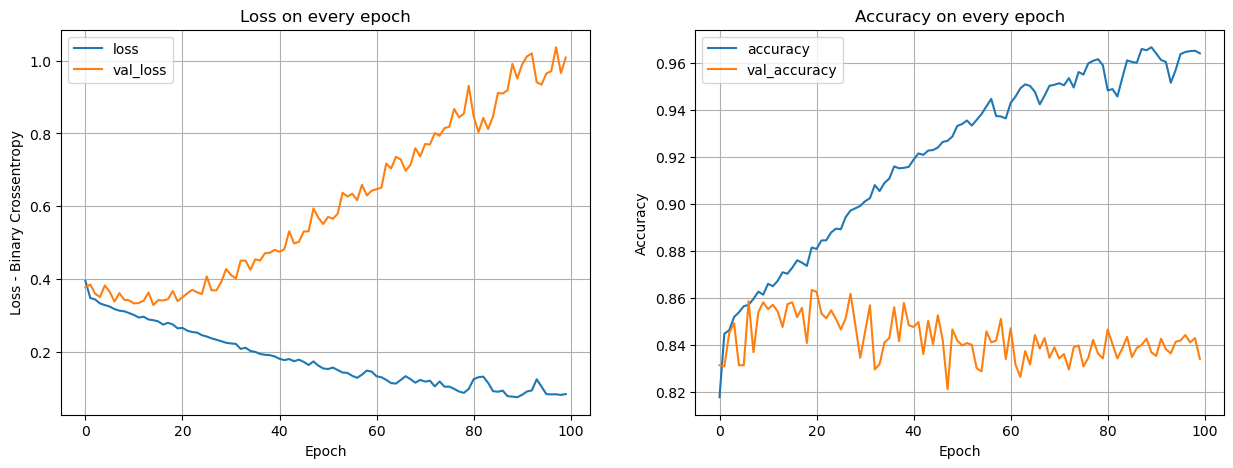

119/119 [==============================] - 0s 987us/step - loss: 1.0085 - accuracy: 0.8339
num_nodes: 128, droupout_prob: 0, learningrate: 0.005, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951F8074D0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

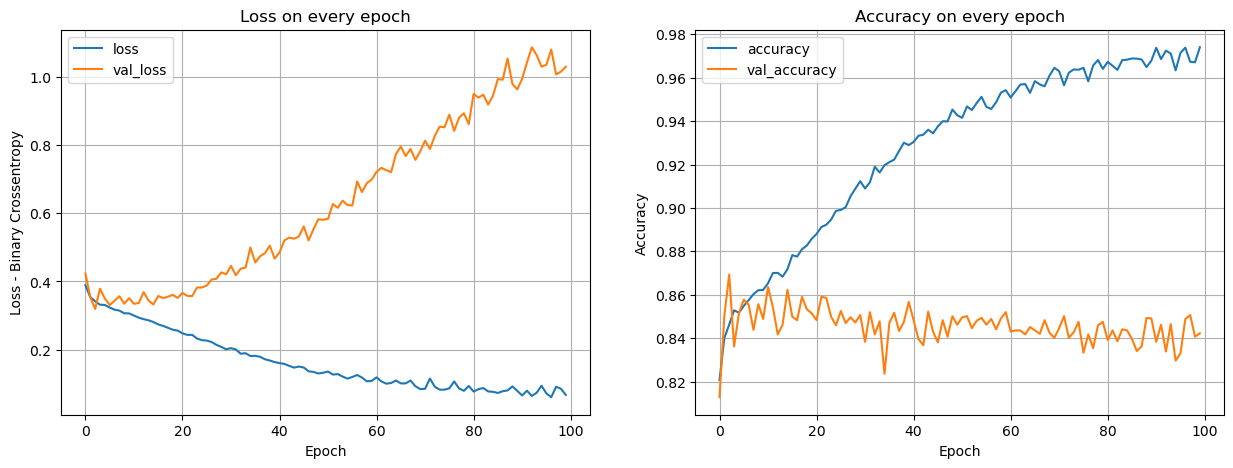

119/119 [==============================] - 0s 981us/step - loss: 1.0291 - accuracy: 0.8423
num_nodes: 128, droupout_prob: 0, learningrate: 0.005, batch_size: 64
History object: <keras.callbacks.History object at 0x000001951F75FED0>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

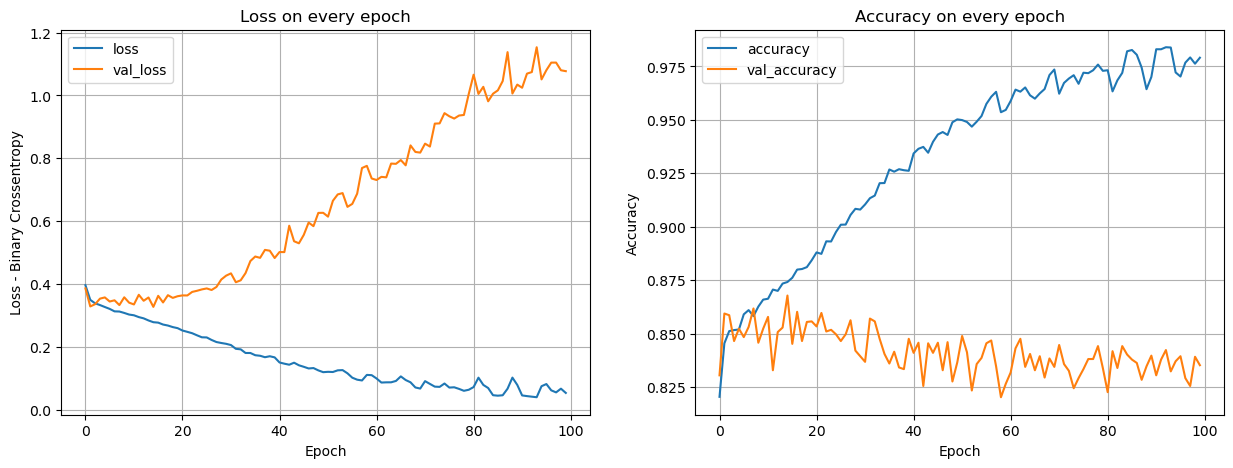

119/119 [==============================] - 0s 971us/step - loss: 1.0773 - accuracy: 0.8352
num_nodes: 128, droupout_prob: 0, learningrate: 0.005, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951E178410>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

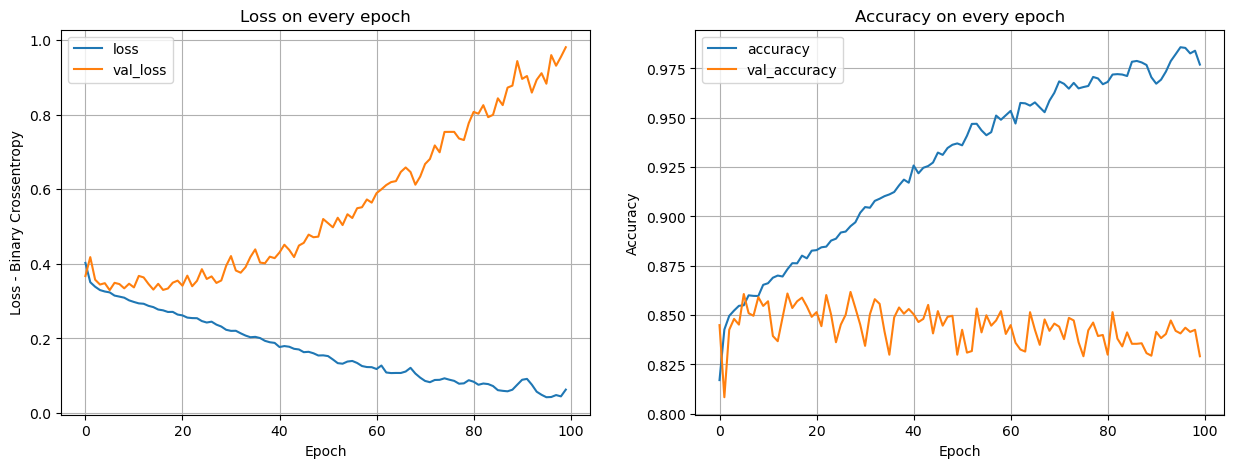

119/119 [==============================] - 0s 907us/step - loss: 0.9815 - accuracy: 0.8291
num_nodes: 128, droupout_prob: 0, learningrate: 0.001, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019527127850>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

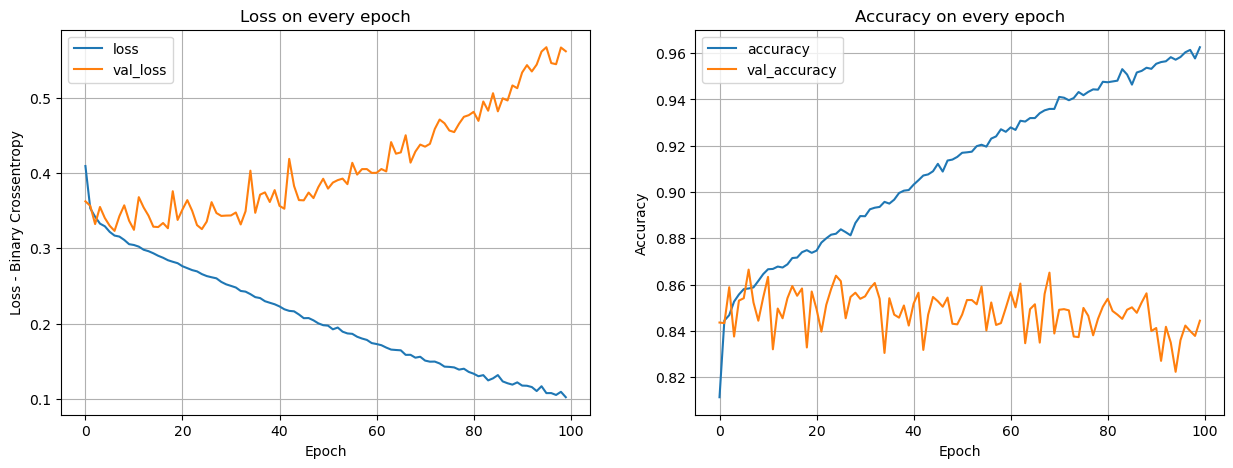

119/119 [==============================] - 0s 984us/step - loss: 0.5614 - accuracy: 0.8444
num_nodes: 128, droupout_prob: 0, learningrate: 0.001, batch_size: 64
History object: <keras.callbacks.History object at 0x000001952D0D5490>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_b

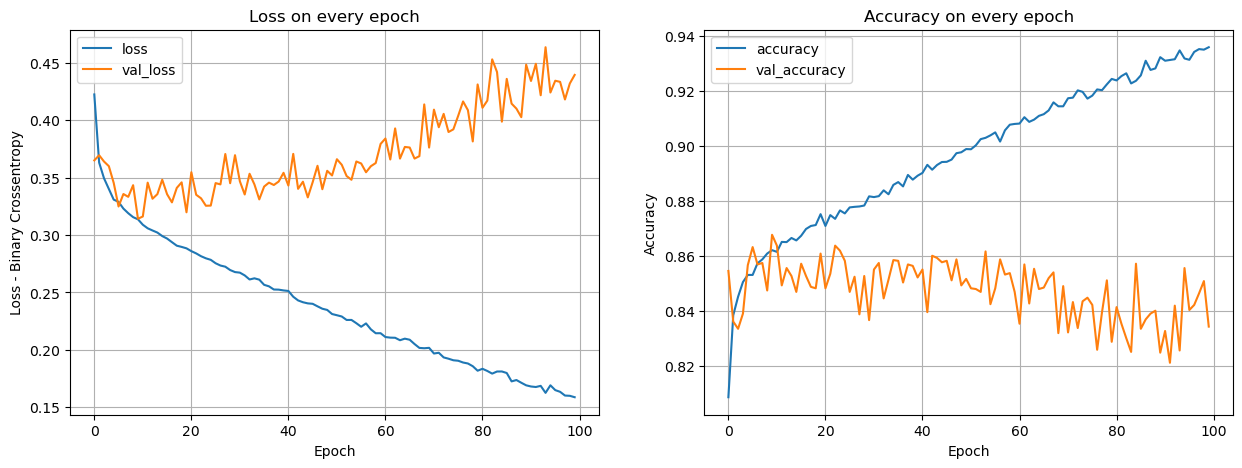

119/119 [==============================] - 0s 891us/step - loss: 0.4394 - accuracy: 0.8344
num_nodes: 128, droupout_prob: 0, learningrate: 0.001, batch_size: 128
History object: <keras.callbacks.History object at 0x0000019518EDD090>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

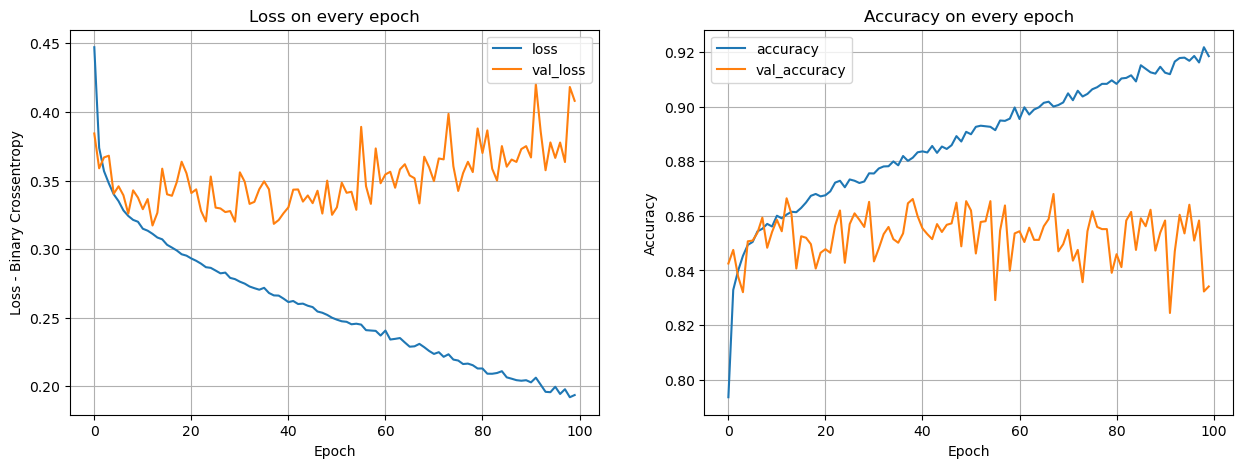

119/119 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8341
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.01, batch_size: 32
History object: <keras.callbacks.History object at 0x000001951B72EA10>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_be

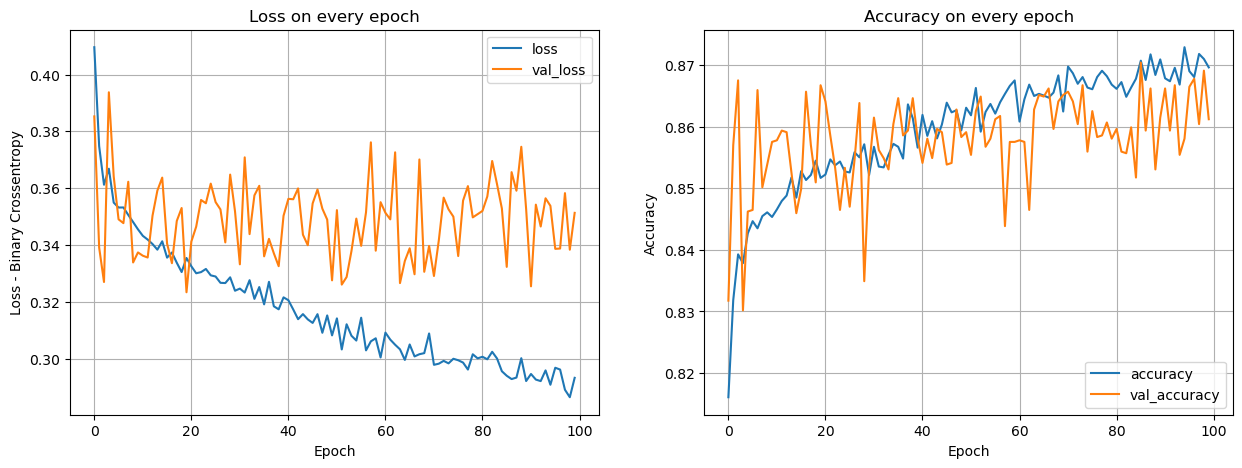

119/119 [==============================] - 0s 891us/step - loss: 0.3513 - accuracy: 0.8612
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.01, batch_size: 64
History object: <keras.callbacks.History object at 0x0000019520825A10>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

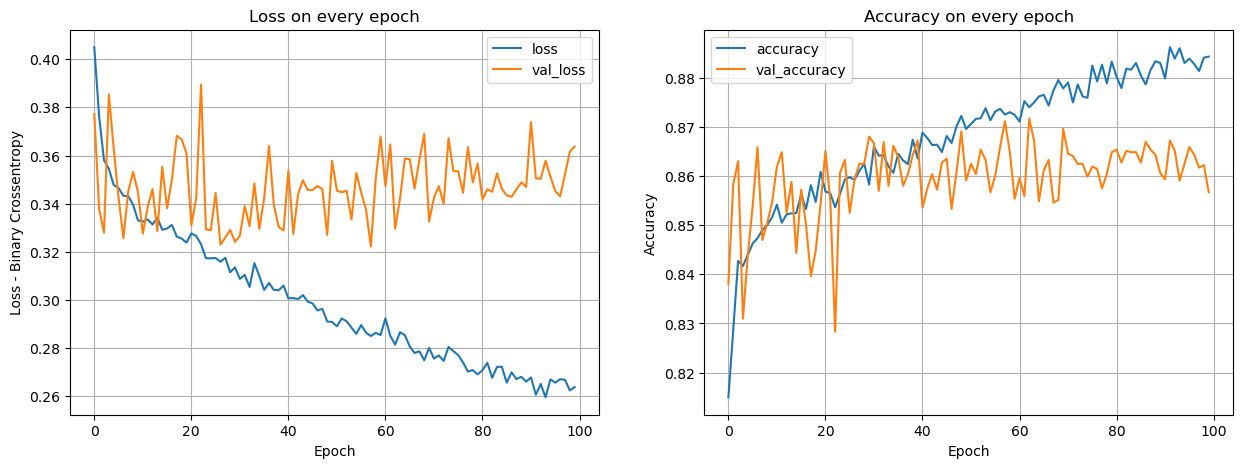

119/119 [==============================] - 0s 858us/step - loss: 0.3637 - accuracy: 0.8567
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.01, batch_size: 128
History object: <keras.callbacks.History object at 0x00000195304D8E50>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

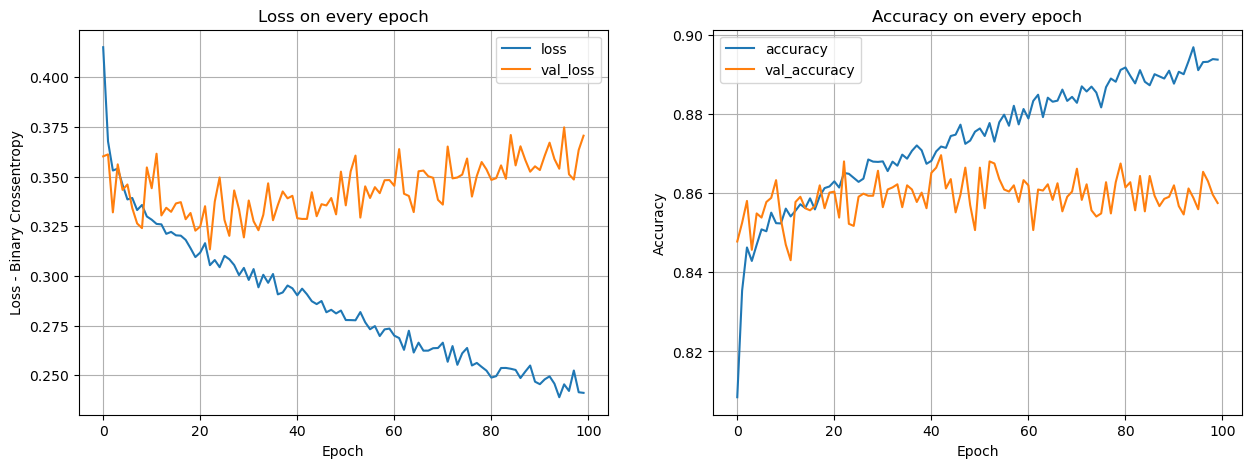

119/119 [==============================] - 0s 857us/step - loss: 0.3706 - accuracy: 0.8575
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.005, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019521F39A90>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

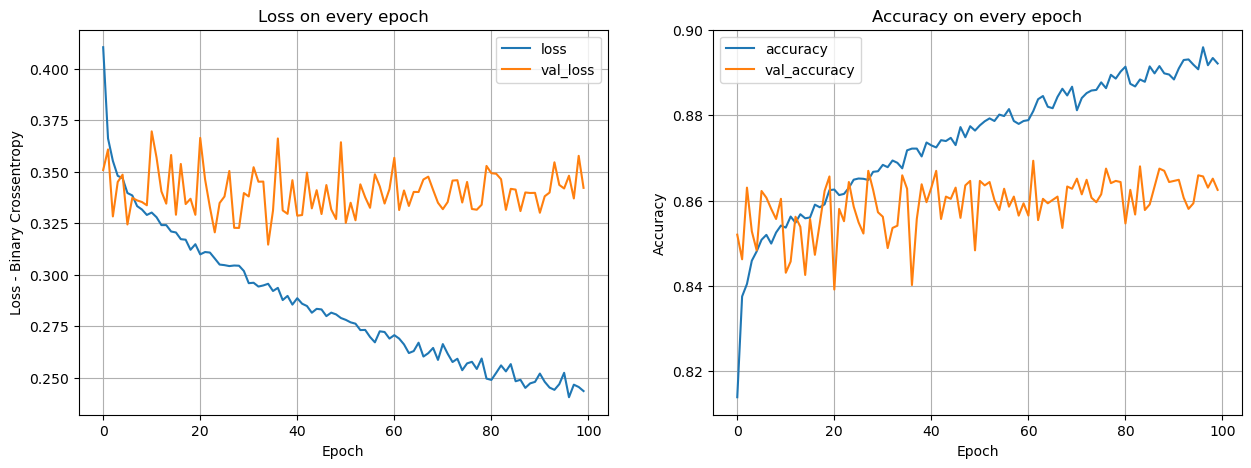

119/119 [==============================] - 0s 875us/step - loss: 0.3421 - accuracy: 0.8625
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.005, batch_size: 64
History object: <keras.callbacks.History object at 0x000001954202A890>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

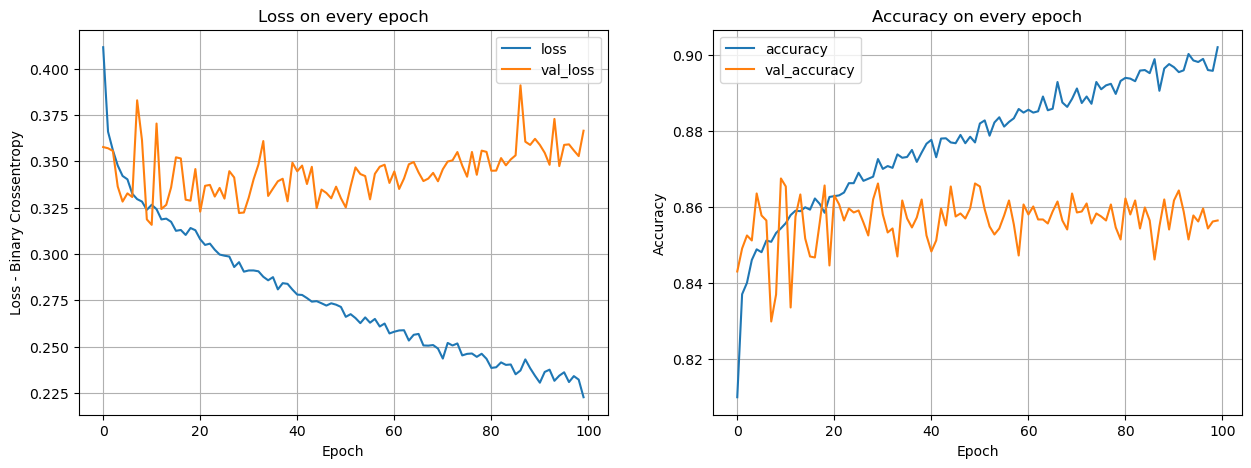

119/119 [==============================] - 0s 875us/step - loss: 0.3665 - accuracy: 0.8565
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.005, batch_size: 128
History object: <keras.callbacks.History object at 0x000001953048A450>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batc

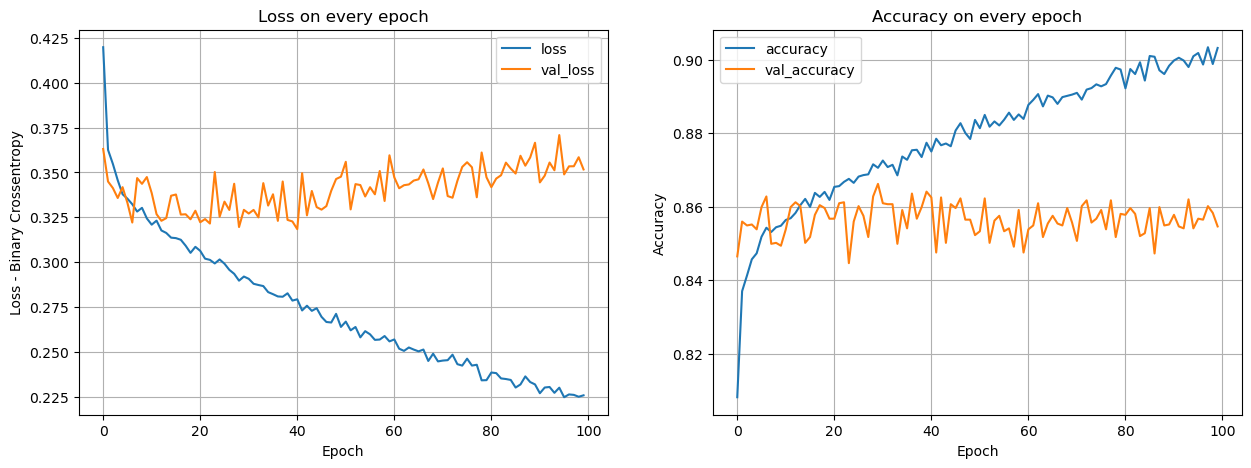

119/119 [==============================] - 0s 891us/step - loss: 0.3516 - accuracy: 0.8546
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.001, batch_size: 32
History object: <keras.callbacks.History object at 0x0000019539D1CB90>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

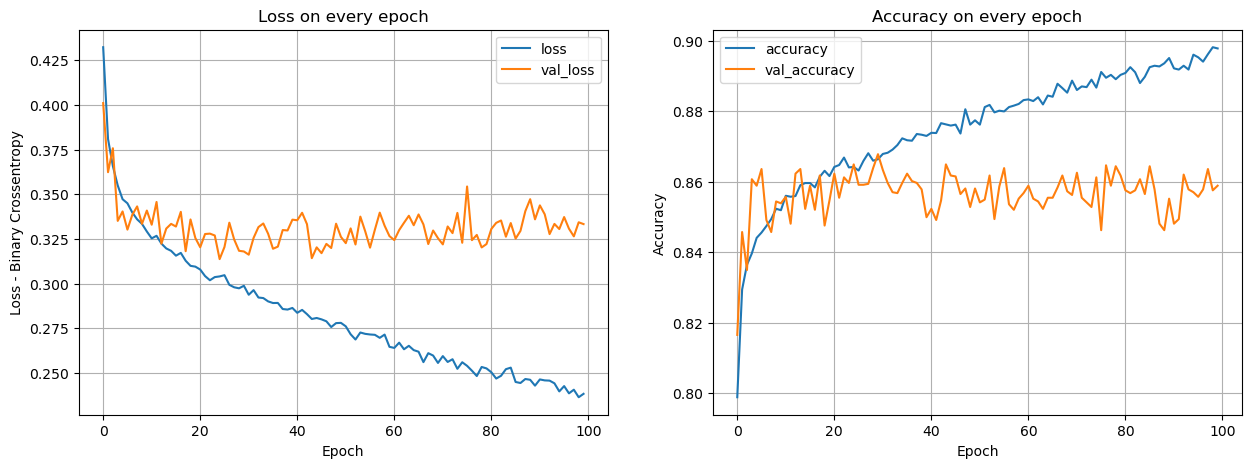

119/119 [==============================] - 0s 930us/step - loss: 0.3333 - accuracy: 0.8588
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.001, batch_size: 64
History object: <keras.callbacks.History object at 0x00000195178C6D50>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch

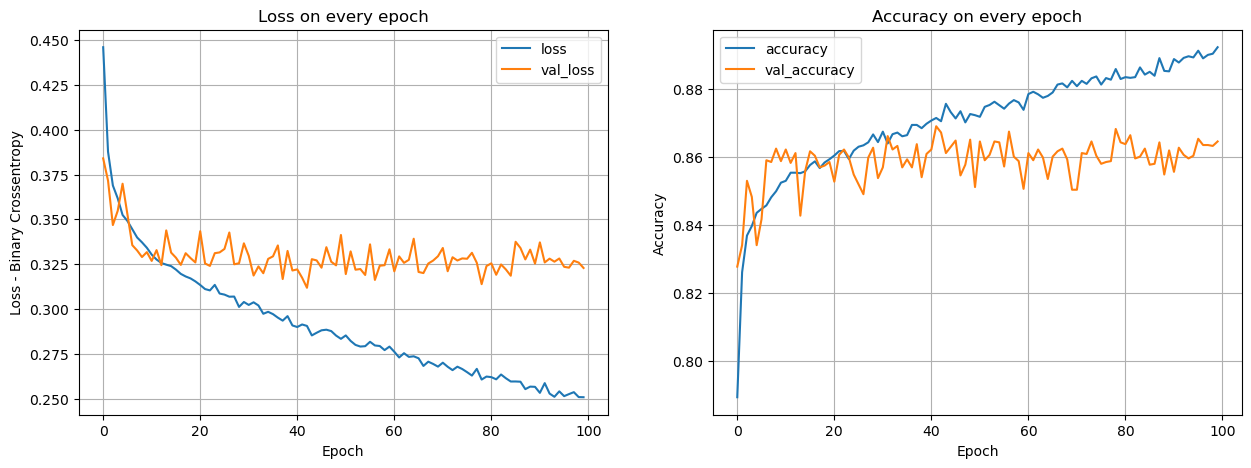

119/119 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8646
num_nodes: 128, droupout_prob: 0.2, learningrate: 0.001, batch_size: 128
History object: <keras.callbacks.History object at 0x000001951EBFD510>
History attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_

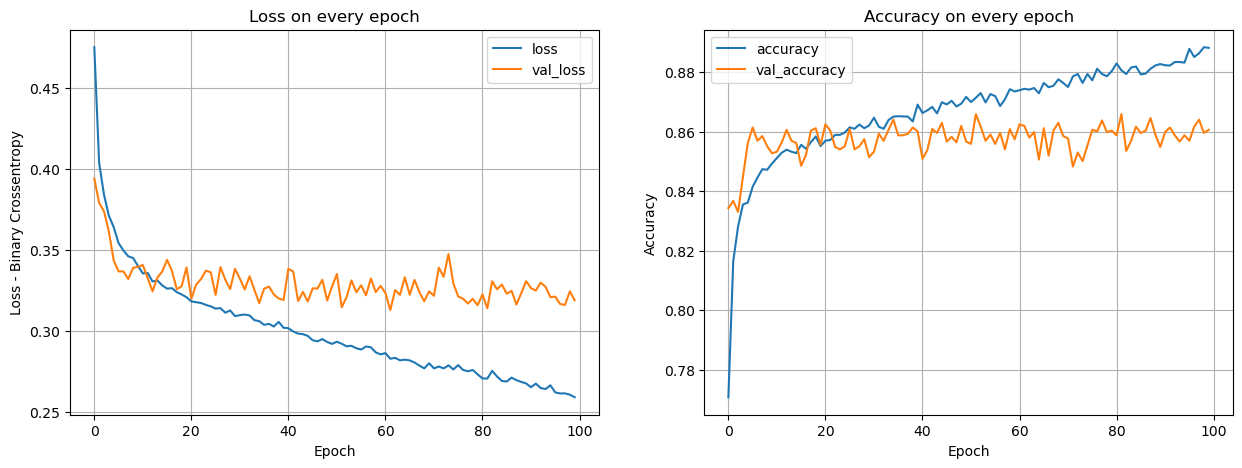

119/119 [==============================] - 0s 955us/step - loss: 0.3187 - accuracy: 0.8607


In [66]:
# Assuming infinite least validation loss
least_val_loss = float('inf')
least_loss_model = None

# Hyperparameters
epochs = 100
for num_nodes in [16,32,64,128]:
    for droupout_prob in [0,0.2]:
        for learningrate in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f'num_nodes: {num_nodes}, droupout_prob: {droupout_prob}, learningrate: {learningrate}, batch_size: {batch_size}')
                # Record model and history for each combination of hyperparameters
                model, history = train_model(X_train, y_train, num_nodes, droupout_prob, learningrate, batch_size, epochs)
                # we have both model and history - Now plot loss and accuracy for each combination of hyperparameters
                plot_history(history)

                # Evaluate loss on validation data too
                validation_loss = model.evaluate(X_val, y_val)[0]

                # Record which model (based on hyperparameters) has the least validation loss
                if validation_loss < least_val_loss:
                    least_val_loss = validation_loss
                    least_loss_model = model



With num_nodes: 32, droupout_prob: 0.2, learningrate: 0.005, batch_size: 64, we got loss: 0.3241 - accuracy: 0.8704. This is better than the previous model, as the accuracy is better, and the loss is lower. 

#### Predictions and Evaluation


In [67]:
y_pred = least_loss_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0). reshape(-1)
y_pred

119/119 [==============================] - 0s 798us/step


array([1, 0, 0, ..., 0, 1, 0])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2516
           1       0.82      0.81      0.82      1288

    accuracy                           0.88      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.88      0.88      0.88      3804



Model shows overall accuracy of 88%. 